### Student Information
Name:李信儒(Hsin-Ju Li)

Student ID:110033630

GitHub ID:popo6699325

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

## 2.1 Data Preparation

In [1]:
### Begin Assignment Here
#get amazon data
amazon = []
tmp = 'initial'
with open('sentiment labelled sentences\\amazon_cells_labelled.txt','r') as fh:
    while tmp:
        tmp = fh.readline()
        tmp=tmp.strip('\n')
        if tmp != '':
            amazon.append(tmp)
# get imdb data
imdb = []
tmp = 'initial'
with open('sentiment labelled sentences\\imdb_labelled.txt','r',encoding="utf-8") as fh:
    while tmp:
        tmp = fh.readline()
        tmp=tmp.strip('\n')
        if tmp != '':
            imdb.append(tmp)
#get yelp data
yelp = []
tmp = 'initial'
with open('sentiment labelled sentences\\yelp_labelled.txt','r') as fh:
    while tmp:
        tmp = fh.readline()
        tmp=tmp.strip('\n')
        if tmp != '':
            yelp.append(tmp)

In [2]:
All_data = []
All_label = []
All_category_name = []
All_category = []

for information in amazon:
    tmp = information.split('\t')
    All_data.append(tmp[0])
    All_label.append(int(tmp[1]))
    #All_category_name.append('amazon')
    All_category.append(0)
    
for information in imdb:
    tmp = information.split('\t')
    All_data.append(tmp[0])
    All_label.append(int(tmp[1]))  
    #All_category_name.append('imdb')
    All_category.append(1)
    
for information in yelp:
    tmp = information.split('\t')
    All_data.append(tmp[0])
    All_label.append(int(tmp[1]))
    #All_category_name.append('yelp')
    All_category.append(2)

All = []
All.append(All_data)
All.append(All_label)
#All.append(All_category_name)

## 2.2 Data Transformation

In [3]:
import pandas as pd
import numpy as np
df_All = pd.DataFrame(np.array(All).T, columns = ['sentence', 'sentiment_label'])
df_All

sentence sentiment_label
0     So there is no way for me to plug it in here i...               0
1                           Good case, Excellent value.               1
2                                Great for the jawbone.               1
3     Tied to charger for conversations lasting more...               0
4                                     The mic is great.               1
...                                                 ...             ...
2995  I think food should have flavor and texture an...               0
2996                           Appetite instantly gone.               0
2997  Overall I was not impressed and would not go b...               0
2998  The whole experience was underwhelming, and I ...               0
2999  Then, as if I hadn't wasted enough of my life ...               0

[3000 rows x 2 columns]

In [4]:
print(len(df_All))
df_All[0:10]

3000


sentence sentiment_label
0  So there is no way for me to plug it in here i...               0
1                        Good case, Excellent value.               1
2                             Great for the jawbone.               1
3  Tied to charger for conversations lasting more...               0
4                                  The mic is great.               1
5  I have to jiggle the plug to get it to line up...               0
6  If you have several dozen or several hundred c...               0
7        If you are Razr owner...you must have this!               1
8                Needless to say, I wasted my money.               0
9                   What a waste of money and time!.               0

In [5]:
for t in df_All['sentence'][:5]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!
The mic is great.


In [6]:
df_All['category']  = All_category
df_All['category_name']=df_All.category.apply(lambda x:'amazon' if x == 0 else ('imdb' if x==1 else 'yelp'))
df_All[1010:1020]

sentence sentiment_label  \
1010               And those baby owls were adorable.                 1   
1011  The movie showed a lot of Florida at it's best...               1   
1012  The Songs Were The Best And The Muppets Were S...               1   
1013                                  It Was So Cool.                 1   
1014  This is a very "right on case" movie that deli...               1   
1015  It had some average acting from the main perso...               0   
1016  This review is long overdue, since I consider ...               1   
1017  I'll put this gem up against any movie in term...               1   
1018  It's practically perfect in all of them  a tr...               1   
1019  " The structure of this film is easily the mos...               1   

      category category_name  
1010         1          imdb  
1011         1          imdb  
1012         1          imdb  
1013         1          imdb  
1014         1          imdb  
1015         1          imdb  
1016         1          imdb  
1017         1          imdb  
1018         1          imdb  
1019         1          imdb

In [7]:
df_All[-10:][['sentence','category_name']]

sentence category_name
2990  The refried beans that came with my meal were ...          yelp
2991         Spend your money and time some place else.          yelp
2992  A lady at the table next to us found a live gr...          yelp
2993            the presentation of the food was awful.          yelp
2994           I can't tell you how disappointed I was.          yelp
2995  I think food should have flavor and texture an...          yelp
2996                           Appetite instantly gone.          yelp
2997  Overall I was not impressed and would not go b...          yelp
2998  The whole experience was underwhelming, and I ...          yelp
2999  Then, as if I hadn't wasted enough of my life ...          yelp

In [8]:
df_All.iloc[::10,0:3][0:5]

sentence sentiment_label  \
0   So there is no way for me to plug it in here i...               0   
10                    And the sound quality is great.               1   
20  I went on Motorola's website and followed all ...               0   
30  This is a simple little phone to use, but the ...               0   
40  It has a great camera thats 2MP, and the pics ...               1   

    category  
0          0  
10         0  
20         0  
30         0  
40         0

In [9]:
df_All.loc[::200,'category'][0:15]

0       0
200     0
400     0
600     0
800     0
1000    1
1200    1
1400    1
1600    1
1800    1
2000    2
2200    2
2400    2
2600    2
2800    2
Name: category, dtype: int64

In [10]:
df_All.loc[lambda t: t['category'] > 1,:][0:10]

sentence sentiment_label  \
2000                           Wow... Loved this place.               1   
2001                                 Crust is not good.               0   
2002          Not tasty and the texture was just nasty.               0   
2003  Stopped by during the late May bank holiday of...               1   
2004  The selection on the menu was great and so wer...               1   
2005     Now I am getting angry and I want my damn pho.               0   
2006              Honeslty it didn't taste THAT fresh.)               0   
2007  The potatoes were like rubber and you could te...               0   
2008                          The fries were great too.               1   
2009                                     A great touch.               1   

      category category_name  
2000         2          yelp  
2001         2          yelp  
2002         2          yelp  
2003         2          yelp  
2004         2          yelp  
2005         2          yelp  
2006         2          yelp  
2007         2          yelp  
2008         2          yelp  
2009         2          yelp

In [11]:
df_All.loc[lambda t: t.sentiment_label == '1'].iloc[::70,:][0:20]

sentence sentiment_label  \
1                           Good case, Excellent value.               1   
130   It is so small and you don't even realize that...               1   
271                                   Worked perfectly!               1   
398   Sounds good reasonably priced and effective, I...               1   
534                               Great case and price!               1   
689                                         Works well.               1   
817      Gets a signal when other Verizon phones won't.               1   
961   I was very impressed with the price of the cases.               1   
1099  If you are looking for a movie with a terrific...               1   
1304       his performance, as awarded, was stunning.                 1   
1414  I would have casted her in that role after rea...               1   
1627  I saw this film over Christmas, and what a gre...               1   
1743  Tom Wilkinson's character is a man who is not ...               1   
1831                       See both films if you can.                 1   
1970  Enough can not be said of the remarkable anima...               1   
2093                           Best breakfast buffet!!!               1   
2215                          Waitress was good though!               1   
2346           This place is like Chipotle, but BETTER.               1   
2468                          Love the margaritas, too!               1   
2591  The waitress was friendly and happy to accomod...               1   

      category category_name  
1            0        amazon  
130          0        amazon  
271          0        amazon  
398          0        amazon  
534          0        amazon  
689          0        amazon  
817          0        amazon  
961          0        amazon  
1099         1          imdb  
1304         1          imdb  
1414         1          imdb  
1627         1          imdb  
1743         1          imdb  
1831         1          imdb  
1970         1          imdb  
2093         2          yelp  
2215         2          yelp  
2346         2          yelp  
2468         2          yelp  
2591         2          yelp

## 2.3 Data Mining using Pandas

### 2.3.1 Missing Values

In [12]:
df_All.isnull()

sentence  sentiment_label  category  category_name
0        False            False     False          False
1        False            False     False          False
2        False            False     False          False
3        False            False     False          False
4        False            False     False          False
...        ...              ...       ...            ...
2995     False            False     False          False
2996     False            False     False          False
2997     False            False     False          False
2998     False            False     False          False
2999     False            False     False          False

[3000 rows x 4 columns]

In [13]:
import helpers.data_mining_helpers as dmh
df_All.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                     sentiment_label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [14]:
df_All.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1 )

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [15]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentence", "category"])
dummy_series

sentence    dummy_record
category               1
dtype: object

In [16]:
result_with_series =df_All.append(dummy_series, ignore_index=True)
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

3001


sentence                     sentiment_label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1

In [17]:
dummy_dict = [{'sentence': 'dummy_record',
               'category': '1'
              }]
df_All_dummy = df_All.append(dummy_dict, ignore_index=True)
print(len(df_All_dummy))
df_All_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

3001


sentence                     sentiment_label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   1   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1

In [18]:
df_All_dummy.dropna(inplace=True)   #remove the raw of missing value
df_All_dummy.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                     sentiment_label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [19]:
print(len(df_All_dummy))

3000


### 2.3.2 Dealing with Duplicate Data

In [20]:
no_duplicate = df_All[:]
no_duplicate.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [21]:
sum(no_duplicate.duplicated('sentence'))

17

In [22]:
print(len(no_duplicate))
no_duplicate.drop_duplicates(keep='first', inplace=True)  #remove duplicate but keep 1 element
print(len(no_duplicate))

3000
2983


<ipython-input-22-639f716a5ef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_duplicate.drop_duplicates(keep='first', inplace=True)  #remove duplicate but keep 1 element


## 2.4 Data Preprocessing

### 2.4.1 Sampling

In [23]:
df_All_sample = df_All.sample(n=1000) #random state
print(len(df_All_sample))
df_All_sample[0:4]

1000


sentence sentiment_label  \
1914  I saw this short film on HBO the other day and...               1   
631   I posted more detailed comments under the grey...               1   
247   Nice headphones for the price and they work gr...               1   
949                 I had to purchase a different case.               0   

      category category_name  
1914         1          imdb  
631          0        amazon  
247          0        amazon  
949          0        amazon

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

yelp      1000
imdb      1000
amazon    1000
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

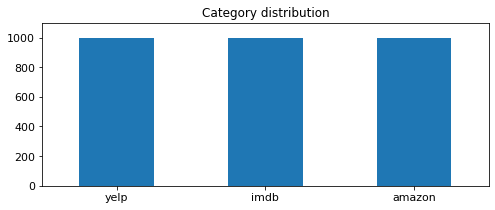

In [25]:
print(df_All.category_name.value_counts())
df_All.category_name.value_counts().plot(kind = 'bar',
                                        title = 'Category distribution',
                                        ylim = [0, 1100],        
                                        rot = 0, fontsize = 11, figsize = (8,3))

amazon    342
yelp      332
imdb      326
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

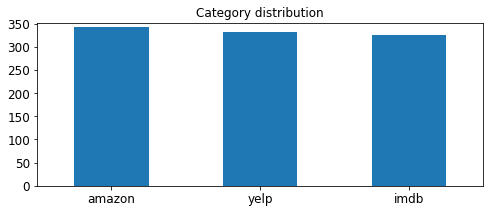

In [26]:
upper_bound = max(df_All_sample.category_name.value_counts()) +10
print(df_All_sample.category_name.value_counts())

# plot barchart for X_sample
df_All_sample.category_name.value_counts().plot(kind = 'bar',
                                               title = 'Category distribution',
                                               ylim = [0, upper_bound], 
                                               rot = 0, fontsize = 12, figsize = (8,3))

yelp      1000
imdb      1000
amazon    1000
Name: category_name, dtype: int64
amazon    342
yelp      332
imdb      326
Name: category_name, dtype: int64
<class 'pandas.core.series.Series'>
           X  X_sample
yelp    1000       332
imdb    1000       326
amazon  1000       342


<AxesSubplot:title={'center':'Category_name distribution'}>

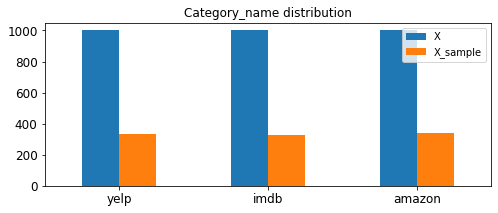

In [27]:
Y_X = df_All.category_name.value_counts()
Y_X_sample = df_All_sample.category_name.value_counts()

print(Y_X)
print(Y_X_sample)
print(type(Y_X))
df = pd.concat([Y_X,Y_X_sample], axis=1)
df.columns = ['X', 'X_sample']
print(df)
df.plot(kind = 'bar',
        title = 'Category_name distribution',
        rot = 0, fontsize = 12, figsize = (8,3))

### 2.4.2 Feature Creation

In [28]:
import nltk

In [29]:
df_All['unigrams'] = df_All['sentence'].apply(lambda x: dmh.tokenize_text(x))
df_All[0:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [30]:
list(df_All[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 2.4.3 Feature subset selection

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_All_counts = count_vect.fit_transform(df_All.sentence)

analyze = count_vect.build_analyzer()
analyze(" ".join(list(df_All[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [32]:
print(df_All_counts.shape)
print(count_vect.get_feature_names()[0:10])

(3000, 5155)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']


In [33]:
df_All_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [34]:
array = df_All_counts[3:4].toarray()[0]
count = 0
first = 0
for i in range(len(array)):
    if array[i] == 1:
        count+=1
        if count == 1:
            first = i
            break
print("The "+str(first+1)+" record :",end='')
print(count_vect.get_feature_names()[first])

The 46 record :45


In [35]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
count_vect.transform(['00 100 zombie Something completely new.']).toarray()

array([[1, 0, 1, ..., 0, 1, 0]], dtype=int64)

In [37]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:50]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020']

In [38]:
plot_y = ["doc_"+ str(i) for i in list(df_All.index)[0:50]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19',
 'doc_20',
 'doc_21',
 'doc_22',
 'doc_23',
 'doc_24',
 'doc_25',
 'doc_26',
 'doc_27',
 'doc_28',
 'doc_29',
 'doc_30',
 'doc_31',
 'doc_32',
 'doc_33',
 'doc_34',
 'doc_35',
 'doc_36',
 'doc_37',
 'doc_38',
 'doc_39',
 'doc_40',
 'doc_41',
 'doc_42',
 'doc_43',
 'doc_44',
 'doc_45',
 'doc_46',
 'doc_47',
 'doc_48',
 'doc_49']

In [39]:
plot_z = df_All_counts[0:50, 0:50].toarray()
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

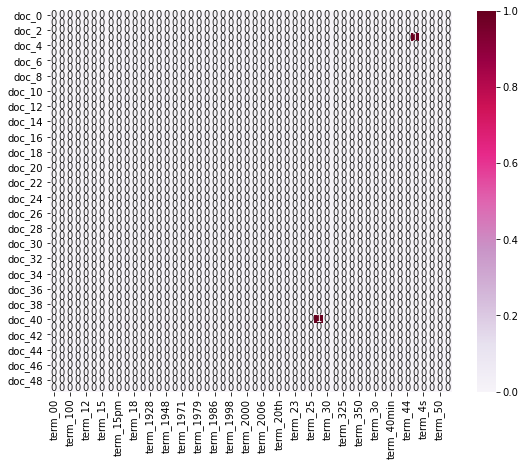

In [40]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

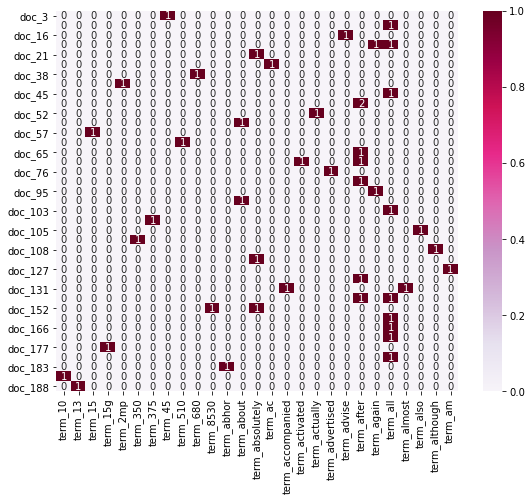

In [41]:
number = 200
plot_x2 = ["term_"+str(i) for i in count_vect.get_feature_names()[0:number]]
plot_y2 = ["doc_"+ str(i) for i in list(df_All.index)[0:number]]
plot_z2 = df_All_counts[0:number, 0:number].toarray()

remove_index_raw = []
remove_index_column = []
for i in range(number):
    if sum(plot_z2[i]) == 0:
        remove_index_raw.append(i)
    if sum(plot_z2[:,i]) == 0:
        remove_index_column.append(i)
new_plot_z2 = np.delete(plot_z2, remove_index_raw, axis = 0)
new_plot_z2 = np.delete(new_plot_z2, remove_index_column, axis = 1)
new_plot_y2 = np.delete(plot_y2, remove_index_raw)
new_plot_x2 = np.delete(plot_x2, remove_index_column)

df_todraw2 = pd.DataFrame(new_plot_z2, columns = new_plot_x2, index = new_plot_y2)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw2,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 2.4.4 Dimensionality Reduction

In [42]:
from sklearn.decomposition import PCA
df_All_reduced = PCA(n_components = 2).fit_transform(df_All_counts.toarray())
print(df_All_counts.shape)
print(df_All_reduced.shape)

(3000, 5155)
(3000, 2)


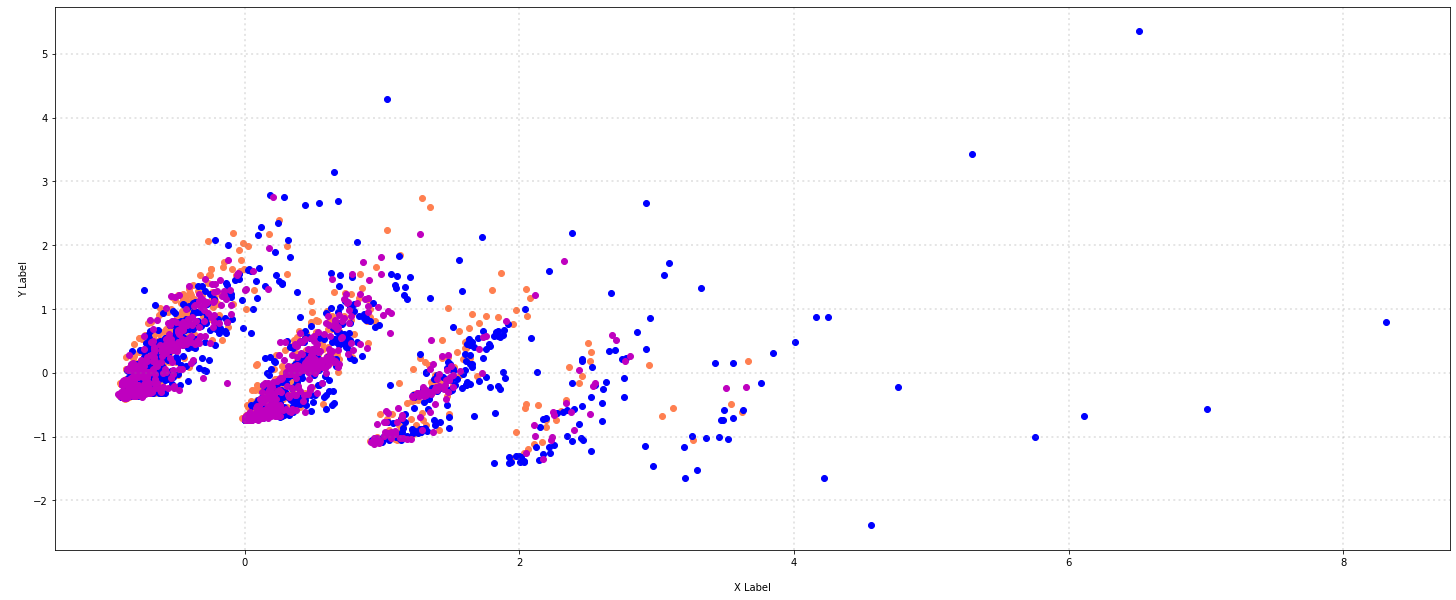

In [43]:
#2D
col = ['coral', 'blue', 'm']
categories = ['amazon', 'imdb', 'yelp']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_All_reduced[df_All['category_name'] == category].T[0]
    ys = df_All_reduced[df_All['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

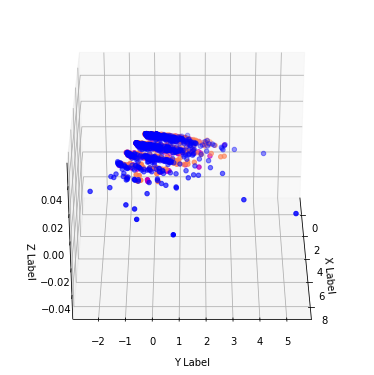

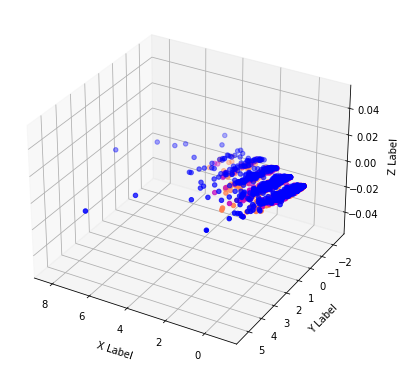

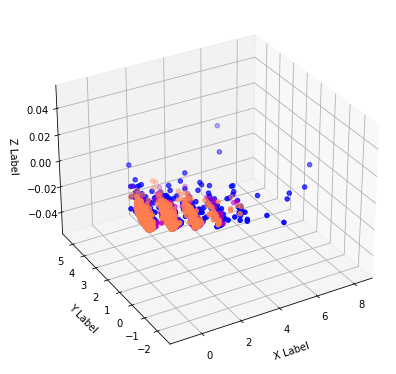

In [44]:
# 3D
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
df_All_reduced = PCA(n_components = 3).fit_transform(df_All_counts.toarray())
col = ['coral', 'blue', 'm']
# plot
fig0 = plt.figure(0,figsize = (5,5))
fig1 = plt.figure(1,figsize = (5,5))
fig2 = plt.figure(2,figsize = (5,5))
ax0 = Axes3D(fig0, elev = 30, azim = 0)
ax1 = Axes3D(fig1, elev = 30, azim = 120)
ax2 = Axes3D(fig2, elev = 30, azim = 240)

for c, category in zip(col, categories):
    xs = df_All_reduced[df_All['category_name'] == category].T[0]
    ys = df_All_reduced[df_All['category_name'] == category].T[1]
    zs = df_All_reduced[df_All['category_name'] == category].T[2]
    
    ax0.scatter(xs, ys, c = c, marker='o')
    ax1.scatter(xs, ys, c = c, marker='o')
    ax2.scatter(xs, ys, c = c, marker='o')

ax0.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)

ax0.set_xlabel('\nX Label')
ax1.set_xlabel('\nX Label')
ax2.set_xlabel('\nX Label')

ax0.set_ylabel('\nY Label')
ax1.set_ylabel('\nY Label')
ax2.set_ylabel('\nY Label')

ax0.set_zlabel('\nZ Label')
ax1.set_zlabel('\nZ Label')
ax2.set_zlabel('\nZ Label')

plt.show()


### 2.4.5 Attribute Transformation / Aggregation

In [45]:
term_frequencies = []
for j in range(0,df_All_counts.shape[1]):
    term_frequencies.append(sum(df_All_counts[:,j].toarray()))
print(term_frequencies)
print(len(term_frequencies))

[array([1], dtype=int64), array([38], dtype=int64), array([3], dtype=int64), array([2], dtype=int64), array([4], dtype=int64), array([3], dtype=int64), array([3], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([9], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([2], dtype=int64), array([1], dtype=int64), array([7], dtype=int64), array([1], dtype=int64), array([1], dtype=int64), array([3], dtype=int64), array([1], dtype=int64), array([1], dtype=int64)

In [46]:
term_frequencies = np.asarray(df_All_counts.sum(axis=0))[0]
print(term_frequencies)
print(len(term_frequencies))

[ 1 38  3 ...  1  2  1]
5155


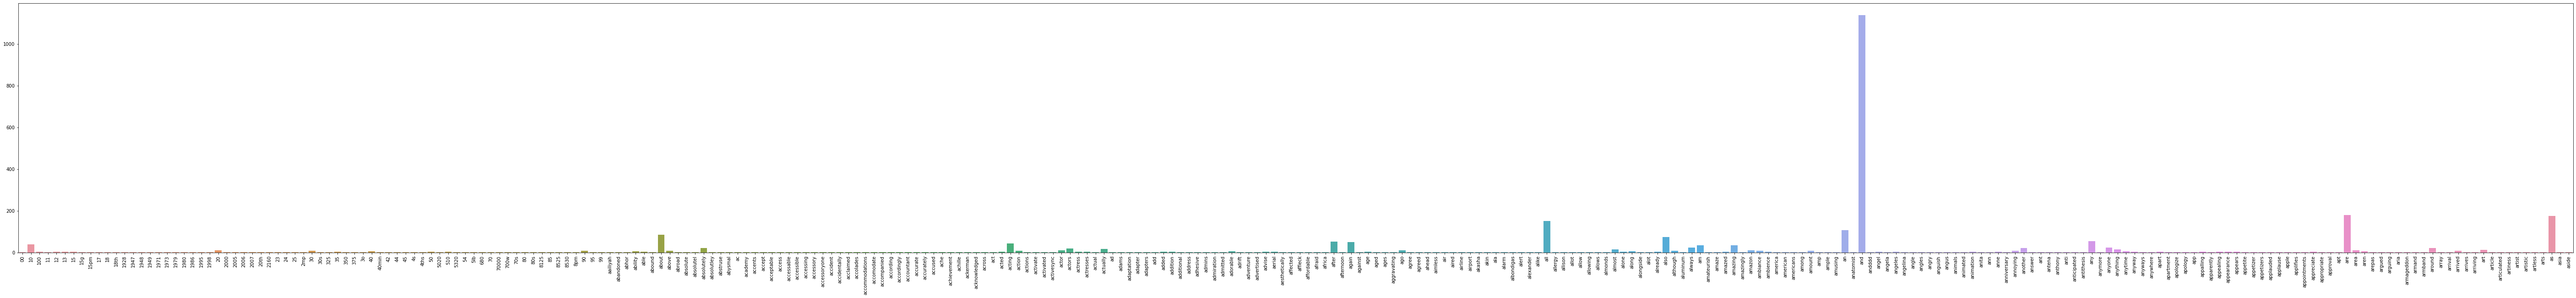

In [47]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [48]:
import plotly.express as px
term_frequencies2 = np.asarray(df_All_counts.sum(axis=0))[0]
fig = px.scatter(x=count_vect.get_feature_names()[:300], y=term_frequencies2[:300])
fig.show()

In [49]:
import plotly.express as px
number = 5155
term_frequencies3 = np.asarray(df_All_counts.sum(axis=0))[0]
term_frequencies3 = term_frequencies3[:number]
x_feature = count_vect.get_feature_names()[:number]
x_feature = np.array(x_feature)

remove_index = []

for i in range(number):
    if term_frequencies3[i] < 50:
        remove_index.append(i)
new_term_frequencies3 = np.delete(term_frequencies3, remove_index)
new_x_feature = np.delete(x_feature, remove_index)

print(new_term_frequencies3)
print(new_x_feature)

fig = px.scatter(x=new_x_feature, y=new_term_frequencies3)
fig.show()

[  85   52  150   74  106 1138   53  180  175  135   73  103  150   57
   51   78   53  201   78   84   53   53   80   77   76   53  163  126
  336  103   55   64  230  210  138   87  184   63   77   56  104  400
  754  789  119  125   61   58   71   67  182   50  254   52   53   83
  306  624  221  146   79   83   90  168  114   56   66  103   50  108
  171   54   50   67  316 1953   54  112  106  643  112  670   56   74
   64  245  571  105   92  105   63   71   58   50   73  274   56   53
   87  222   82]
['about' 'after' 'all' 'also' 'an' 'and' 'any' 'are' 'as' 'at' 'back'
 'bad' 'be' 'because' 'been' 'best' 'better' 'but' 'by' 'can' 'could' 'do'
 'don' 'even' 'ever' 'excellent' 'film' 'food' 'for' 'from' 'get' 'go'
 'good' 'great' 'had' 'has' 'have' 'he' 'here' 'how' 'if' 'in' 'is' 'it'
 'just' 'like' 'love' 'made' 'me' 'more' 'movie' 'much' 'my' 'never'
 'nice' 'no' 'not' 'of' 'on' 'one' 'only' 'or' 'out' 'phone' 'place'
 'product' 'quality' 'really' 'recommend' 'service' 'so' 's

In [50]:
import plotly.express as px
import pandas as pd

number = 200
term_frequencies3 = np.asarray(df_All_counts.sum(axis=0))[0]
term_frequencies3 = term_frequencies3[:number]
x_feature = count_vect.get_feature_names()[:number]

data = {'frequency':term_frequencies3,'feature':x_feature}
df_data = pd.DataFrame(data=data)
df_data_sort=df_data.sort_values(by=['frequency'],ascending=False)

sort_frequncies=list(df_data_sort['frequency'])
sort_feature=list(df_data_sort['feature'])

fig = px.bar(x=sort_feature,y=sort_frequncies)
fig.show()

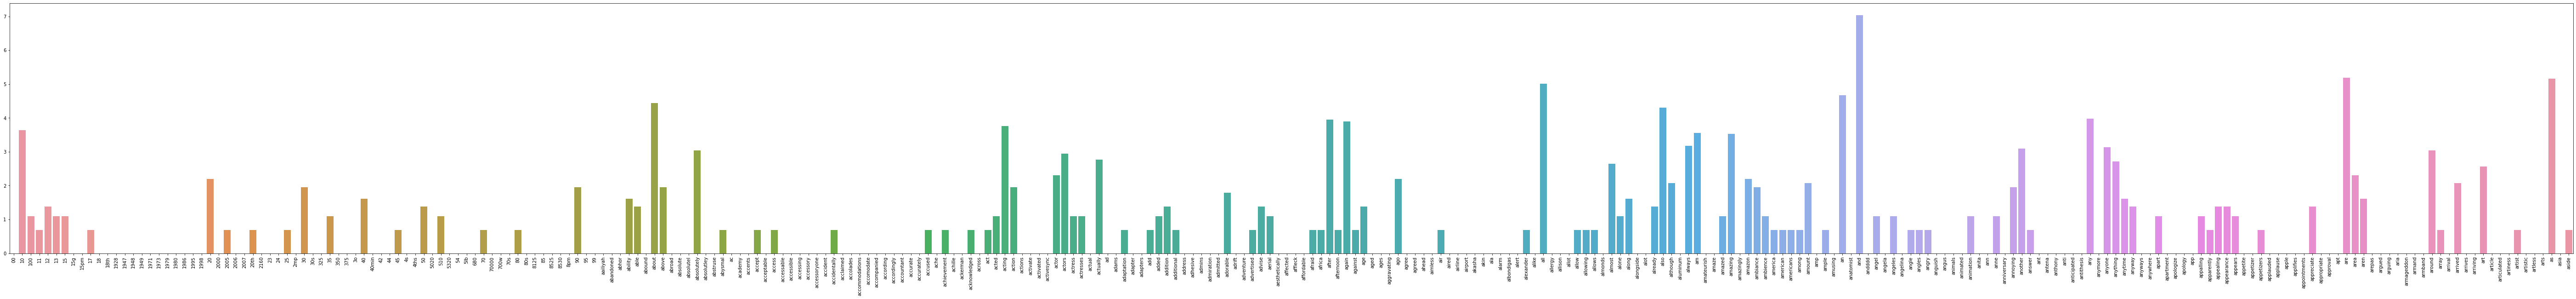

In [51]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 2.4.6 Discretization and Binarization

In [52]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_All.category)

LabelBinarizer()

In [53]:
mlb.classes_

array([0, 1, 2], dtype=int64)

In [54]:
df_All['bin_category'] = mlb.transform(df_All['category']).tolist()
df_All[::500]

sentence sentiment_label  \
0     So there is no way for me to plug it in here i...               0   
500   The bose noise cancelling is amazing, which is...               1   
1000  A very, very, very slow-moving, aimless movie ...               0   
1500  The entire audience applauded at the conclusio...               1   
2000                           Wow... Loved this place.               1   
2500  I also had to taste my Mom's multi-grain pumpk...               1   

      category category_name  \
0            0        amazon   
500          0        amazon   
1000         1          imdb   
1500         1          imdb   
2000         2          yelp   
2500         2          yelp   

                                               unigrams bin_category  
0     [So, there, is, no, way, for, me, to, plug, it...    [1, 0, 0]  
500   [The, bose, noise, cancelling, is, amazing, ,,...    [1, 0, 0]  
1000  [A, very, ,, very, ,, very, slow-moving, ,, ai...    [0, 1, 0]  
1500  [The, entire, audience, applauded, at, the, co...    [0, 1, 0]  
2000                  [Wow, ..., Loved, this, place, .]    [0, 0, 1]  
2500  [I, also, had, to, taste, my, Mom, 's, multi-g...    [0, 0, 1]

In [55]:
mlb.fit(df_All.category_name)
print(mlb.classes_)
df_All['bin_category_name'] = mlb.transform(df_All['category_name']).tolist()
df_All[::500]

['amazon' 'imdb' 'yelp']


sentence sentiment_label  \
0     So there is no way for me to plug it in here i...               0   
500   The bose noise cancelling is amazing, which is...               1   
1000  A very, very, very slow-moving, aimless movie ...               0   
1500  The entire audience applauded at the conclusio...               1   
2000                           Wow... Loved this place.               1   
2500  I also had to taste my Mom's multi-grain pumpk...               1   

      category category_name  \
0            0        amazon   
500          0        amazon   
1000         1          imdb   
1500         1          imdb   
2000         2          yelp   
2500         2          yelp   

                                               unigrams bin_category  \
0     [So, there, is, no, way, for, me, to, plug, it...    [1, 0, 0]   
500   [The, bose, noise, cancelling, is, amazing, ,,...    [1, 0, 0]   
1000  [A, very, ,, very, ,, very, slow-moving, ,, ai...    [0, 1, 0]   
1500  [The, entire, audience, applauded, at, the, co...    [0, 1, 0]   
2000                  [Wow, ..., Loved, this, place, .]    [0, 0, 1]   
2500  [I, also, had, to, taste, my, Mom, 's, multi-g...    [0, 0, 1]   

     bin_category_name  
0            [1, 0, 0]  
500          [1, 0, 0]  
1000         [0, 1, 0]  
1500         [0, 1, 0]  
2000         [0, 0, 1]  
2500         [0, 0, 1]

## 2.5 Data Exploration

In [56]:
document_to_transform_1 = []
random_record_1 = df_All.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df_All.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df_All.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [57]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [58]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)


# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## 3

## 3.1 Visulazition

In [59]:
import plotly.express as px
number = 5155
term_frequencies3 = np.asarray(df_All_counts.sum(axis=0))[0]
term_frequencies3 = term_frequencies3[:number]
x_feature = count_vect.get_feature_names()[:number]
x_feature = np.array(x_feature)

remove_index = []

for i in range(number):
    if term_frequencies3[i] < 50:
        remove_index.append(i)
new_term_frequencies3 = np.delete(term_frequencies3, remove_index)
new_x_feature = np.delete(x_feature, remove_index)

print(new_term_frequencies3)
print(new_x_feature)

fig = px.scatter(x=new_x_feature, y=new_term_frequencies3,size = new_term_frequencies3)
fig.show()
# delete some word with low frequency.
# use size to let us know the differences between each other.
# the larger circle , the more important.

[  85   52  150   74  106 1138   53  180  175  135   73  103  150   57
   51   78   53  201   78   84   53   53   80   77   76   53  163  126
  336  103   55   64  230  210  138   87  184   63   77   56  104  400
  754  789  119  125   61   58   71   67  182   50  254   52   53   83
  306  624  221  146   79   83   90  168  114   56   66  103   50  108
  171   54   50   67  316 1953   54  112  106  643  112  670   56   74
   64  245  571  105   92  105   63   71   58   50   73  274   56   53
   87  222   82]
['about' 'after' 'all' 'also' 'an' 'and' 'any' 'are' 'as' 'at' 'back'
 'bad' 'be' 'because' 'been' 'best' 'better' 'but' 'by' 'can' 'could' 'do'
 'don' 'even' 'ever' 'excellent' 'film' 'food' 'for' 'from' 'get' 'go'
 'good' 'great' 'had' 'has' 'have' 'he' 'here' 'how' 'if' 'in' 'is' 'it'
 'just' 'like' 'love' 'made' 'me' 'more' 'movie' 'much' 'my' 'never'
 'nice' 'no' 'not' 'of' 'on' 'one' 'only' 'or' 'out' 'phone' 'place'
 'product' 'quality' 'really' 'recommend' 'service' 'so' 's

## 3.2 TF-IDF

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer()
tfidf = tf_vectorizer.fit_transform(df_All.sentence)
word_list = tf_vectorizer.get_feature_names()
weight_list = tfidf.toarray()
print(tfidf.shape)

for i in range(len(weight_list)):
    print("---- The weight of the ", i+1," sentence.----")
    for j in range(len(word_list)):
        if weight_list[i][j] !=0:
            print(word_list[j], weight_list[i][j])
    

(3000, 5155)
---- The weight of the  1  sentence.----
by 0.22339534467811012
converter 0.3982952688733835
for 0.15620766310867332
go 0.23151202391135026
here 0.22277715355242936
in 0.2956111707754561
is 0.12068394874592439
it 0.11981679118086065
me 0.22865092628677175
no 0.22339534467811012
plug 0.30861882226834114
so 0.18746612963796125
the 0.08671624087955355
there 0.20763211346881053
to 0.1274893309301928
unless 0.33187908783248754
us 0.27541073174789316
way 0.24912940464591313
---- The weight of the  2  sentence.----
case 0.513063291919973
excellent 0.47072204948062
good 0.3364192842689825
value 0.6340416987777308
---- The weight of the  3  sentence.----
for 0.352293799045279
great 0.3996123298170515
jawbone 0.8233779731740677
the 0.1955703921972776
---- The weight of the  4  sentence.----
45 0.3605118665785291
charger 0.2788296059318666
conversations 0.3473970917279169
for 0.14863871175751736
lasting 0.3473970917279169
major 0.3605118665785291
minutes 0.254047407560696
more 0.2202

love 0.6285845136736294
thing 0.7022418828343239
this 0.3342721154433772
---- The weight of the  56  sentence.----
about 0.33116902322642805
and 0.1549987189721688
everything 0.385513320883519
fine 0.4247562671760552
for 0.23411034262650637
is 0.1808705157491044
it 0.17957089605933924
price 0.3914181830833966
reasonable 0.4973912637626677
the 0.12996269491255025
---- The weight of the  57  sentence.----
disappointed 0.8347470049435879
very 0.5506336692736012
---- The weight of the  58  sentence.----
15 0.33898637845378177
and 0.19205495015444984
dropped 0.3029129356867155
even 0.20685037701317252
for 0.145040070272607
great 0.16452120518594765
into 0.2493553752685082
it 0.2225017065983544
phone 0.17489016005971092
seconds 0.33898637845378177
still 0.2365581177879312
stream 0.3698203573178919
submerged 0.3698203573178919
this 0.11543083027756673
was 0.12393742640217677
works 0.22403975795069625
---- The weight of the  59  sentence.----
510 0.3201101026367952
and 0.09068023630664511
any 

is 0.3059358247475724
light 0.401321333352509
phone 0.23874293963276041
slim 0.4802206100617392
the 0.10991355912768516
this 0.15757487862843506
---- The weight of the  113  sentence.----
and 0.11965457637113788
battery 0.14350761593049682
but 0.10263797220943763
case 0.15271255753146704
down 0.1627178819291326
embedded 0.23040644436766122
geeky 0.23040644436766122
it 0.06931179702338033
its 0.4400901337681778
leather 0.19995889313094486
little 0.15030107589559272
on 0.10155629129200863
oozes 0.23040644436766122
right 0.1518851959277026
rocks 0.20501185403380515
sex 0.4383383182591613
sleek 0.21916915912958065
stylish 0.23040644436766122
thats 0.20501185403380515
think 0.14232809513503752
to 0.07375021932227824
toast 0.21916915912958065
---- The weight of the  114  sentence.----
fast 0.5523334592920496
great 0.32431841198449307
product 0.4352662017184506
shipping 0.6326836895605319
---- The weight of the  115  sentence.----
absolutely 0.8479244278180191
great 0.5301171235769365
---- Th

---- The weight of the  169  sentence.----
doesn 0.5569472828622389
last 0.5987085987206542
long 0.5756368107846473
---- The weight of the  170  sentence.----
at 0.22168156202260744
button 0.42431947944418996
hate 0.36537191062372776
is 0.13516134791000467
mode 0.4460752731951214
one 0.2188884055919002
set 0.35971864576244655
side 0.3456411266091909
the 0.19423766167354425
thing 0.2924999080304709
---- The weight of the  171  sentence.----
excellent 0.760585390536806
service 0.6492379099390102
---- The weight of the  172  sentence.----
for 0.23909437310153955
money 0.40632249415889166
my 0.2626520732286734
thank 0.5799051789137962
wasting 0.5424460100366235
you 0.2796642801372104
---- The weight of the  173  sentence.----
audio 0.49953849026678215
be 0.2941333208280209
can 0.34112021267768694
how 0.36809624934557417
is 0.1847933399207572
poor 0.4189450492351424
quality 0.35337518530112055
that 0.24478681189703197
the 0.13278140087413046
---- The weight of the  174  sentence.----
and 0.

have 0.17936786317008266
horrible 0.2822952747136592
in 0.144887711905337
my 0.16821104982374627
never 0.23833318627078243
on 0.1720909636751119
sound 0.24118032214670854
that 0.15670827178941693
the 0.08500435009348253
there 0.20353318692016767
tick 0.3904324049622613
---- The weight of the  226  sentence.----
and 0.13516653242876486
are 0.24311722579090272
certainly 0.4083615672994364
comfortable 0.37637626600353646
decent 0.41977761546828
functionality 0.49516426622892357
is 0.15772801604120681
these 0.34315102494923305
very 0.22399578078757207
---- The weight of the  227  sentence.----
but 0.17531591777929278
doesn 0.2669650997977143
don 0.22012704885401135
hair 0.3501807427784128
headbands 0.3935572418963461
is 0.11924832083482469
lightweight 0.3501807427784128
like 0.20013026315262575
mess 0.30873672551116715
my 0.16955733177813792
one 0.1931178936926987
this 0.12283974717701827
up 0.22326324385580276
usually 0.37436283526054703
very 0.16934924690883774
---- The weight of the  22

---- The weight of the  298  sentence.----
and 0.18500978741230686
one 0.3496267199833314
priced 0.5745724625965479
right 0.46968947886290713
this 0.22239294903156015
was 0.23878204537456832
works 0.43164258934257543
---- The weight of the  299  sentence.----
customer 0.6375592110652768
service 0.441328769249123
terrible 0.5635244303472632
was 0.2849340032721067
---- The weight of the  300  sentence.----
battery 0.27687275884089707
enough 0.2885145142573572
in 0.16496264011901465
life 0.30341742323866683
long 0.3116599172505146
motorola 0.3404802600130283
not 0.1780535031948837
razor 0.44452879725694977
still 0.28434588172561215
v3i 0.44452879725694977
---- The weight of the  301  sentence.----
back 0.516999300609675
it 0.2741531058424435
sending 0.8108956762284832
---- The weight of the  302  sentence.----
decision 0.5132481763224391
know 0.3866545152296027
made 0.34318880326025913
now 0.3689691925007088
that 0.23152032791443414
wise 0.5287306624537772
---- The weight of the  303  sen

---- The weight of the  351  sentence.----
jerks 0.7563167847434323
on 0.3333618897302853
phone 0.3576665289572621
the 0.16466414143601119
were 0.4022625338999583
---- The weight of the  352  sentence.----
advertised 0.5040422172938555
as 0.2573013358380914
charm 0.4415265603275036
like 0.2694554375752776
works 0.6420167672638359
---- The weight of the  353  sentence.----
battery 0.38253233558494687
comfortable 0.4440640107747528
good 0.2669180184904344
life 0.4192069167604553
nice 0.37068692341233056
range 0.521620267745608
---- The weight of the  354  sentence.----
angeles 0.4322810363940953
coverage 0.4486003107907218
horrible 0.3409828241228111
in 0.17500902640430757
is 0.14289568501249067
los 0.4322810363940953
network 0.41962282376131255
their 0.28569920479448924
---- The weight of the  355  sentence.----
excellent 0.37751113904903333
headset 0.38506038915161644
starter 0.6208061971092736
wireless 0.5690461336579211
---- The weight of the  356  sentence.----
appealing 0.359107640

earpiece 0.5375671717397844
for 0.2369439235407293
ll 0.42357414078012134
looking 0.4739459029883338
new 0.4073580553363123
---- The weight of the  412  sentence.----
device 0.5148722142833004
everyone 0.5040751896656288
highly 0.47129026420498654
recommend 0.4103421040277829
this 0.2098159131051991
to 0.21516722161623333
---- The weight of the  413  sentence.----
awesome 0.44092000632200085
era 0.5635506765268734
is 0.1862884401159451
jawbone 0.5635506765268734
too 0.36838490071714597
---- The weight of the  414  sentence.----
after 0.17476698299691035
battery 0.17762729187007573
but 0.12704067953737194
colored 0.2712777572479761
couple 0.229976874006678
dead 0.2422121920817881
goes 0.2422121920817881
hoursthe 0.28518676501644563
last 0.2079588248318704
lasts 0.2537544798383719
longer 0.2422121920817881
original 0.22670736941848307
received 0.22372254558458826
still 0.1824216623432902
than 0.16524314998662568
that 0.11446571676667448
thereplacement 0.28518676501644563
to 0.09128471439

---- The weight of the  440  sentence.----
again 0.227502607852812
anyone 0.259249924590966
as 0.1795550132196421
bad 0.19996862480621297
comes 0.30287581396486074
don 0.20682502767593267
earpad 0.3697750361485947
find 0.26735932797870765
if 0.19445908653600902
it 0.11123721960201298
not 0.14811130569391406
one 0.18144800430318575
only 0.20625841393802583
recommend 0.22572322750005044
the 0.08050685913645801
this 0.11541668432778973
to 0.1183603613636158
too 0.22156332153494163
unit 0.30287581396486074
with 0.15276375461353167
would 0.2019679985688334
you 0.16962990560866897
---- The weight of the  441  sentence.----
displeased 0.9185678267394315
very 0.3952633902592016
---- The weight of the  442  sentence.----
again 0.21531343386732207
alone 0.32078479104667024
because 0.2082151771423382
built 0.33289491059071274
but 0.15589628904709016
buying 0.3037165361906051
defect 0.34996316544677786
gotten 0.3113914525641334
have 0.1607759611564366
it 0.10527733265307607
might 0.291606416646562

time 0.416990136208764
was 0.2714876576559486
---- The weight of the  476  sentence.----
easy 0.6571503664583067
to 0.29560860099231295
use 0.5681946798292377
very 0.3973962212915852
---- The weight of the  477  sentence.----
don 0.24711029179610047
ear 0.29445845461380743
env 0.44179961249547445
in 0.1639498519118081
lg 0.3931060084612219
the 0.0961879404845001
uncomfortable 0.4049643230250577
use 0.27181543956550897
vx9900 0.44179961249547445
with 0.18251899396607912
---- The weight of the  478  sentence.----
destination 0.4127989867215483
of 0.13463286595397184
out 0.22378397798873148
rocketed 0.4127989867215483
switch 0.3926661298801893
the 0.1797479365930452
to 0.1321317895004216
unit 0.3381159269413646
unknown 0.4127989867215483
volume 0.31985701832694374
---- The weight of the  479  sentence.----
and 0.08335752740695575
charge 0.24072878972913136
comfortable 0.23211215339308935
conditions 0.3210259412317687
for 0.12590335862869192
holds 0.2786032832163002
is 0.19454249781733185


even 0.21758169145291045
is 0.23573887430224985
little 0.25376067047432466
low 0.28886885123631406
my 0.1675967185250223
of 0.12687303058651878
only 0.21698560897256675
sound 0.2402994964180403
standard 0.37003402960768284
the 0.08469390180340389
to 0.12451610869272958
turned 0.3376003963102722
up 0.22068162222819873
volume 0.301421417288858
when 0.22400158464149283
---- The weight of the  522  sentence.----
again 0.2753791794426881
amazon 0.3609417419848202
for 0.3510827517760784
good 0.19452363572568068
having 0.34681635719907766
need 0.3511257628548982
price 0.2934944506730921
thanks 0.4102737620661443
the 0.09744904912408395
things 0.32362350941822393
to 0.14326859590084337
---- The weight of the  523  sentence.----
back 0.21614334832709856
edge 0.3492400053219565
ended 0.33065771095158075
instead 0.32359305050938186
it 0.11461595824439355
my 0.16415012516617145
of 0.12426391181328042
on 0.16793637074874745
or 0.21081521059715255
pants 0.3810066473673303
pockets 0.3810066473673303


don 0.3505330084399854
it 0.3770560814205591
just 0.31932603405580695
none 0.4981953711386149
of 0.20439764395808874
works 0.3796624956580214
---- The weight of the  561  sentence.----
and 0.1641371273962025
around 0.22852298572683735
casing 0.31606189298417064
glued 0.31606189298417064
insert 0.31606189298417064
low 0.2347015758428568
muddy 0.31606189298417064
off 0.20834973897075212
poorly 0.2684347709081132
quality 0.18313284203223246
slid 0.31606189298417064
sound 0.19523970910044952
super 0.24208293403600845
the 0.13762503040715665
was 0.10592142056308369
wire 0.30064705658886837
---- The weight of the  562  sentence.----
dont 0.5203153901413801
money 0.40831819832385385
please 0.5316748786978024
waste 0.4038507207977544
your 0.34172293217224503
---- The weight of the  563  sentence.----
all 0.5508368650432478
in 0.20828792462928156
purchase 0.4252449950459753
quite 0.3881093504411187
satisfied 0.48710714135928956
this 0.17519003532983365
with 0.2318788459721746
---- The weight of

work 0.327197139152493
---- The weight of the  612  sentence.----
50 0.31952646263100143
and 0.09324534843525767
belt 0.31165104132566823
cent 0.3591058501624291
clipping 0.3591058501624291
coming 0.2692838976269546
deffinitely 0.3591058501624291
feel 0.2641962324889073
like 0.18261116971538968
make 0.23079811859640836
this 0.11208654586353464
to 0.11494528845352697
up 0.20371912509737541
will 0.2043149307985909
you 0.16473554326716325
your 0.20030720262198662
---- The weight of the  613  sentence.----
24 0.2761580060964034
5020 0.2761580060964034
and 0.14341425788523257
behing 0.2761580060964034
comfortible 0.2761580060964034
day 0.20137503369908769
design 0.21398084602541156
ear 0.3681173880848993
headsets 0.2301083500694265
hours 0.2166396890959818
in 0.10248099573475591
is 0.08367621023414618
jabra 0.2261958561360255
like 0.1404308409253814
look 0.18405869404244965
of 0.09006791443985006
pain 0.2761580060964034
pretty 0.174244021377222
the 0.12024940313858316
to 0.0883947216541977


the 0.27612496141847687
to 0.20297804786800483
transfer 0.317066516708165
used 0.21641681278804276
was 0.10625809883508969
you 0.14545049839238558
---- The weight of the  640  sentence.----
accessory 0.570650448814714
disappointing 0.4421681179850597
from 0.3028152311794712
good 0.24800488248904398
manufacturer 0.570650448814714
---- The weight of the  641  sentence.----
and 0.0852521704436935
awful 0.2336238255802753
call 0.2544005292924581
echo 0.3123097682810059
end 0.23738785780573882
for 0.12876503086332017
incoming 0.32832257757748884
muffled 0.32832257757748884
of 0.10708119689855129
on 0.14471480351910876
other 0.20281345508662477
performed 0.3123097682810059
severe 0.32832257757748884
sound 0.20281345508662477
the 0.14296378565549178
those 0.23738785780573882
tinny 0.3009484992788936
---- The weight of the  642  sentence.----
resistant 0.7182673557485626
very 0.30907330072014777
wind 0.6233503833703168
---- The weight of the  643  sentence.----
customer 0.33424990540520283
for

is 0.1794894684158617
none 0.4709023720698355
of 0.19319997928798355
the 0.12897035720351763
tones 0.5634811947469145
---- The weight of the  682  sentence.----
awful 0.4386556176028391
balance 0.5650654400934371
camera 0.4353594476633878
color 0.5136674579203697
is 0.18678916339374985
---- The weight of the  683  sentence.----
call 0.24342425132822046
can 0.17571631379430322
care 0.2464489467431359
clearly 0.2795316141433496
coming 0.23557786715588253
cool 0.2271456027292359
don 0.17571631379430322
for 0.12320937901479495
how 0.189612088796472
if 0.1652103435153612
in 0.11658220876059615
is 0.1903798326679285
it 0.18901188511691552
looks 0.23801668231648926
not 0.12583376857357123
prime 0.2988349581572496
product 0.1875689685544579
ready 0.2795316141433496
tell 0.24342425132822046
this 0.09805677073191034
time 0.1617089034984198
worthless 0.2795316141433496
you 0.14411573907551517
---- The weight of the  684  sentence.----
are 0.25886475490402044
because 0.32977043418055707
love 0.325

best 0.36341596026636547
ear 0.43185079494729545
gels 0.6163392775642034
jabra 0.5307158175511013
the 0.14106858849427217
---- The weight of the  715  sentence.----
it 0.35531039407465065
not 0.4730924287868782
worth 0.8061873713269447
---- The weight of the  716  sentence.----
and 0.12982560797026632
completely 0.3788056826216683
crashed 0.4755985135758375
get 0.30403907059455665
have 0.2296965369913381
it 0.15040705438897997
now 0.3198178587682549
phone 0.23644505220521217
replaced 0.49998349628546684
the 0.108855647274773
to 0.16003845990406732
---- The weight of the  717  sentence.----
18 0.3239510993149786
about 0.17972386608310062
after 0.1985223832618826
another 0.23051322172639435
because 0.19273895709341857
best 0.18169728125324078
ever 0.1822066561084207
for 0.12705057815177123
headset 0.20093345870122312
is 0.09815757534981692
it 0.19490455575445012
just 0.16506324092160343
months 0.2575228255830505
one 0.15896227358870446
owned 0.28824634514508674
purchased 0.28824634514508

for 0.1553658466301289
if 0.20832866050916712
is 0.1200335726073386
like 0.20144812358683642
loud 0.3300905629966265
override 0.37682801949034317
phone 0.18734104123009082
then 0.25976219896528974
this 0.12364864853957519
to 0.12680228000401017
you 0.363457132780541
your 0.22096956156634703
---- The weight of the  746  sentence.----
again 0.3046624027416806
and 0.1285803985687592
buy 0.3523598807154151
fantastic 0.3610921602445807
for 0.19420806419303377
get 0.30112291010011444
is 0.15004254976154185
my 0.2133431667016473
next 0.3677171965334224
phone 0.23417721301270705
whatever 0.4126148097437257
will 0.2817394720110005
---- The weight of the  747  sentence.----
away 0.4108760003975909
be 0.261548499987221
careful 0.515863473062644
from 0.2877779475530389
stay 0.42543218632622504
store 0.4518816421426088
this 0.16927037793367197
---- The weight of the  748  sentence.----
awesome 0.31966912541315917
blueant 0.44574084292545346
free 0.35944895853489583
hands 0.3496735763475978
is 0.135

like 0.3658788232836595
simple 0.5893311834446965
to 0.23030380314043278
use 0.4426711376109006
---- The weight of the  789  sentence.----
activesync 0.2742446292526093
and 0.07121030191958998
be 0.13226362048722562
communication 0.2742446292526093
data 0.4880366958154596
entertainment 0.2742446292526093
for 0.21511233501130533
great 0.12200263189305456
it 0.08249937682809438
management 0.2285140309518674
oh 0.2151386883811291
optimal 0.2742446292526093
results 0.2440183479077298
sure 0.20364886777176602
synchronization 0.2742446292526093
to 0.08778227367227057
tool 0.2440183479077298
use 0.1687279081747534
---- The weight of the  790  sentence.----
because 0.32182092604923374
can 0.3025448303642679
case 0.3585125491940243
disgusting 0.4812919355993882
is 0.16389609176163894
smell 0.5145280467722247
the 0.11776589281430572
this 0.16883218425513952
use 0.33279211260691627
---- The weight of the  791  sentence.----
not 0.37266319145560467
wanted 0.7502753466657238
what 0.5460852039011417

unfortunately 0.6141229574517653
work 0.4748958230841755
---- The weight of the  832  sentence.----
all 0.2534770659346155
broke 0.4165612456414746
months 0.41063913321268564
of 0.16847541387997259
three 0.40523266815119646
two 0.3387206292321415
use 0.31781387595009075
within 0.43042630393173326
---- The weight of the  833  sentence.----
buy 0.6197742039603521
dont 0.7397479102309209
it 0.26201710901064734
---- The weight of the  834  sentence.----
and 0.12933952902189014
battery 0.31024651155727867
dying 0.47381782924905075
father 0.47381782924905075
has 0.2720642968815806
is 0.1509283913832607
my 0.21460273111903405
the 0.21689616355375282
v265 0.4981115123534868
---- The weight of the  835  sentence.----
after 0.2374968106284717
and 0.10063115456909422
come 0.2826023359371454
ear 0.2583012200194719
easily 0.3080803722738197
however 0.27576817318122515
lost 0.31252341350916085
off 0.25547510327978695
one 0.38034031596090195
only 0.2161731969112815
pads 0.3875500163898501
the 0.08437

to 0.15946907431318347
using 0.19079624392738462
you 0.11427273333571697
your 0.27789572421931974
---- The weight of the  866  sentence.----
item 0.6332212008811281
recommend 0.5389839680675461
this 0.27559300471271864
would 0.48226101716211717
---- The weight of the  867  sentence.----
been 0.24721205927998227
cancellation 0.40181011118679394
choice 0.3487120566537857
for 0.15758615124770228
good 0.34925362668082793
great 0.17875241976343398
headset 0.24922618121256818
it 0.1208741402392383
my 0.17311293779280407
noise 0.3683089687251592
sound 0.24820862926888154
volume 0.3113422954802925
years 0.27601709004940383
---- The weight of the  868  sentence.----
case 0.3996075746059661
feels 0.502375351712885
good 0.2620255558224038
hands 0.47297040707878374
in 0.2237377577154473
nice 0.3638924329370203
your 0.3363006206598827
---- The weight of the  869  sentence.----
counterfeit 0.6608992791339562
item 0.47397293270312274
received 0.5184604870928762
the 0.1438899870656568
was 0.2214863355

cheaper 0.42127809592329046
competitors 0.44287795124621276
much 0.2714026486141107
quickly 0.3627530440342745
seller 0.39406549649625533
shipped 0.42127809592329046
than 0.25661270683205534
the 0.0964227147591815
---- The weight of the  911  sentence.----
good 0.3579921068020262
samsung 0.714873972907031
show 0.6006636782156587
---- The weight of the  912  sentence.----
10 0.30391651616116355
about 0.25153624532488134
alot 0.45339244568042103
and 0.1177277857107092
bought 0.3251565766968157
money 0.3021850520296664
of 0.29574454554081
saved 0.45339244568042103
so 0.21339878638080914
these 0.298878794962978
---- The weight of the  913  sentence.----
always 0.18295246045331823
and 0.0682361102236998
beep 0.7883713274128392
cuts 0.24997373863268388
failed 0.233826601426841
it 0.07905368210606804
makes 0.1900060015680063
out 0.14246229396206378
says 0.233826601426841
signal 0.22319075404975555
sound 0.1623325389150144
then 0.1723166130762328
---- The weight of the  914  sentence.----
coul

the 0.08699289304079165
your 0.2228756199774338
---- The weight of the  941  sentence.----
and 0.12586754773504147
been 0.2982344894478963
do 0.2947696747173531
good 0.21066827675064212
have 0.22269366025963439
lot 0.3374720140679019
of 0.15809624074093956
phone 0.2292364300113269
rating 0.4116951097781131
so 0.22815329252339006
this 0.1513004015608339
very 0.20858565448208297
websites 0.48474024169297203
---- The weight of the  942  sentence.----
and 0.2073598240379305
cables 0.39929137029486694
computer 0.3465261601515607
fine 0.28412294438526925
have 0.1834377448228643
ipod 0.3798173011844231
it 0.12011644243293408
just 0.20345147089257423
my 0.34405556367358336
these 0.26321506838021747
tried 0.2994179471962798
with 0.1649577255034437
works 0.24189350364984863
---- The weight of the  943  sentence.----
and 0.12920123057717026
is 0.3015340173760761
joke 0.4225991191780954
low 0.36949266626436317
mic 0.4427374970083301
quite 0.34406275745610115
the 0.21666424371987036
there 0.2593888

it 0.09084238777032393
need 0.23689527007023387
not 0.120955780027174
securely 0.3019784865333717
so 0.14213258988606445
sound 0.18654002008499745
that 0.12120542798388503
the 0.13149259469107802
through 0.23129595708462442
to 0.09665953430064589
used 0.20611833209200625
your 0.1684418838127006
---- The weight of the  980  sentence.----
enough 0.5969605245506159
not 0.36840750607950423
volume 0.7126808834201556
---- The weight of the  981  sentence.----
echo 0.5961197569840712
problem 0.4653637655483457
unsatisfactory 0.5961197569840712
very 0.2696646739585447
---- The weight of the  982  sentence.----
and 0.12786287315287373
at 0.2447153354668203
could 0.29720711675660194
only 0.2746716578387278
poor 0.33826329495070256
quality 0.2853210814926734
take 0.35039358435324847
the 0.10720994137501758
time 0.2534703207358536
very 0.2118922753360889
videos 0.49242462533832737
was 0.1650256389456357
you 0.22589394780549227
---- The weight of the  983  sentence.----
don 0.45626993440304886
mone

tale 0.30270935974317503
the 0.0740690532639109
this 0.10618728181320479
to 0.10889556497686399
two 0.22307920184923488
---- The weight of the  1018  sentence.----
acting 0.16840954486906717
against 0.25501095941968127
any 0.32481666448987917
aspect 0.24573411827442804
cinematography 0.21311317363211799
directing 0.21618662687178222
editing 0.22768827091658556
film 0.12738973807462933
gem 0.23853844125330761
in 0.09948548553566863
ll 0.18795551627510504
making 0.21618662687178222
movie 0.12426031689769354
of 0.17487047495957636
or 0.1483349247093607
other 0.16560370189357962
post 0.2680859326559535
production 0.23265914503815585
put 0.20772620532756497
screenplay 0.2680859326559535
terms 0.25501095941968127
this 0.08367679382671833
up 0.15208393744318532
---- The weight of the  1019  sentence.----
all 0.18001827036265602
faux 0.33627409324564467
in 0.27228120925600463
it 0.11036071710794634
masterpiece 0.3489689577854563
masterpieces 0.3489689577854563
of 0.23930095997819828
perfect 0.

is 0.12951847316721887
roller 0.4274519986316712
scene 0.32740053858214846
there 0.22283157450854668
totally 0.30906163998424746
train 0.4274519986316712
unnecessary 0.4274519986316712
---- The weight of the  1068  sentence.----
absolutely 0.30302676036960763
characters 0.27779988891314544
charm 0.35484553128835605
no 0.23885457889910958
or 0.4712636968087404
scenes 0.3079089785610784
there 0.22200051258894668
these 0.28072780121399227
to 0.13631175035154738
warmth 0.40508803876879196
was 0.14271718142306486
---- The weight of the  1069  sentence.----
grates 0.557717026246898
movie 0.2585070157695192
my 0.24028273600557448
nerves 0.557717026246898
on 0.24582503727917637
this 0.17407840895107024
totally 0.4032474741743612
---- The weight of the  1070  sentence.----
about 0.13086441666012724
actors 0.17055051381883676
any 0.14289912197390803
are 0.11016573445802508
as 0.11453948509998052
because 0.14034124536386877
but 0.10507725542753196
by 0.1323013422654847
delivering 0.22437791024069

writing 0.22843153844565095
---- The weight of the  1112  sentence.----
and 0.14526261763050596
aren 0.48550674977285746
as 0.27164962948320726
cinematography 0.44471875045762593
directing 0.4511323487398835
good 0.2431303849418406
quite 0.38683421631492154
the 0.2435984165869359
---- The weight of the  1113  sentence.----
before 0.21226742295144083
boring 0.23528885446905223
columbo 0.2959818528289254
during 0.2321910470070784
found 0.20751339469914334
happened 0.2513805764653528
in 0.10983753622097614
instead 0.2513805764653528
movie 0.2743806693929638
myself 0.23868211861926902
never 0.1806773648049683
occupied 0.27130420052099036
of 0.0965333888854839
paper 0.27130420052099036
peaking 0.2959818528289254
so 0.13931014684121257
sometimes 0.2513805764653528
that 0.11879855270295445
the 0.12888143873006397
was 0.09919202222238002
watching 0.21061120216111717
---- The weight of the  1114  sentence.----
and 0.1381686674327098
away 0.40314909517512926
embarrassing 0.47346646553491445
had 

---- The weight of the  1158  sentence.----
few 0.27331898469761406
for 0.1580230372183248
get 0.24501740969285407
had 0.19950279664705348
just 0.20530244759982794
minutes 0.2700867254936529
of 0.13141219979859234
out 0.21843065301182055
relief 0.40292407455884083
some 0.2431882897594285
the 0.0877240174216655
theatre 0.40292407455884083
to 0.2579419074018857
walk 0.40292407455884083
---- The weight of the  1159  sentence.----
hate 0.6589209912393069
like 0.40908277668657234
movies 0.5424182056480612
that 0.3228883697257467
---- The weight of the  1160  sentence.----
movie 0.2936487435342373
much 0.3882395170109069
pretty 0.3997329632509941
sucked 0.49699280466349116
the 0.13793199291953687
yeah 0.5807124661865307
---- The weight of the  1161  sentence.----
is 0.20236512264669437
no 0.37459352958081776
or 0.3695393497678276
plot 0.45586045101250977
storyline 0.5942588412546365
there 0.34816144602599586
---- The weight of the  1162  sentence.----
boyfriend 0.3027329792289326
bring 0.283

stocking 0.2249202179156418
talents 0.2249202179156418
that 0.09027646832610167
the 0.09793857632617167
them 0.14129317102078634
to 0.1439882937894197
wanted 0.18137745141909806
who 0.1383812619358884
work 0.1347686179164528
---- The weight of the  1192  sentence.----
also 0.16015851092281397
frances 0.2839466775275731
from 0.15067609072550286
going 0.18618915248871776
great 0.1263187617203729
hasn 0.27009815077937566
it 0.08541798616903913
marion 0.2839466775275731
missed 0.25265107044391844
renowned 0.2839466775275731
screenwriter 0.26027246468294685
see 0.17837314422189776
silent 0.5205449293658937
sound 0.17540129940087085
step 0.26027246468294685
that 0.11396798152549313
to 0.18177555580932292
---- The weight of the  1193  sentence.----
because 0.29074235017454153
it 0.14700455334597426
more 0.28404467632535785
movie 0.2265044199474872
needed 0.4071861430343285
of 0.15937886078816055
suffered 0.4886728940367362
suspense 0.4002628248935218
the 0.10639312013537698
this 0.15252788759

watch 0.31554009539984457
---- The weight of the  1218  sentence.----
and 0.109631833265846
chase 0.4222133688216349
hitchcock 0.3664190822716027
movie 0.19569981344582132
much 0.25873906401534363
perfected 0.4222133688216349
pretty 0.2663987776513136
secondly 0.4222133688216349
the 0.09192365326574775
thriller 0.3664190822716027
---- The weight of the  1219  sentence.----
audience 0.40304682154956595
films 0.3233241070977785
his 0.2892608953934615
it 0.1397082122667484
most 0.29568899026066403
of 0.1514683403133829
pandering 0.4644183792621293
sabotages 0.4644183792621293
that 0.1864041013922626
the 0.10111246402424422
this 0.14495740446302333
to 0.14865451103973695
---- The weight of the  1220  sentence.----
certain 0.4519090755257593
energy 0.4227178577322676
hence 0.4519090755257593
lacks 0.40349009412036907
story 0.32226476584744856
the 0.10343357584496879
whole 0.3681149924916089
---- The weight of the  1221  sentence.----
addition 0.3151934025023352
depending 0.3542360586950896


ridiculousness 0.555309769865615
the 0.12090119951122041
this 0.17332703981390937
---- The weight of the  1261  sentence.----
angry 0.6083006541248024
came 0.4286605200115356
feeling 0.4955080631325548
it 0.1923738341440634
of 0.20856716226450822
out 0.34667604316861056
---- The weight of the  1262  sentence.----
about 0.19817604234608535
be 0.17227693331591837
can 0.39959528534032895
crafted 0.3397892824974081
else 0.2880578113092202
is 0.10823537370445813
it 0.10745766362709798
or 0.19764882948952484
said 0.2678630202663428
spoilers 0.3274283580737625
superbly 0.3397892824974081
surface 0.3572110269774724
whatever 0.29764568917005263
---- The weight of the  1263  sentence.----
and 0.09397854794432392
are 0.1690344750992452
art 0.2804408640242572
cinematography 0.28771354319065257
fx 0.33175346529076005
if 0.19033326066892559
is 0.10966508980692875
least 0.2714013096464572
not 0.14496883769653257
nothing 0.25197225515754124
of 0.11804198467079055
say 0.23609756175685337
simply 0.27140

summary 0.48092837040144276
the 0.11423107379910905
weren 0.48092837040144276
witticisms 0.5246732998459479
witty 0.4990841565242197
---- The weight of the  1287  sentence.----
go 0.3510757296233338
let 0.48014086877474543
one 0.2963787150536484
plot 0.4122617272252618
said 0.4529187578559816
that 0.24242559399039215
the 0.13150058913846965
well 0.3274332434969062
---- The weight of the  1288  sentence.----
acting 0.6826620909648856
bad 0.587675224574845
the 0.23659654892702653
was 0.36418727739471735
---- The weight of the  1289  sentence.----
bad 0.71535284005785
really 0.6987634179185169
---- The weight of the  1290  sentence.----
above 0.34086217185618595
billy 0.3749691170449411
bob 0.4090760622336963
couldn 0.29829917655562604
even 0.22880713845443656
rise 0.4090760622336963
script 0.28889812772927675
the 0.0890634188326082
was 0.13709314090678953
which 0.24254402337285555
worse 0.3133257617816955
---- The weight of the  1291  sentence.----
again 0.49011355954472957
bad 0.4307965

only 0.11450675008178841
or 0.11358641506972134
our 0.12786077449907085
pitiful 0.18816915577906235
say 0.13391353376925674
sense 0.3763383115581247
some 0.12390146587661033
things 0.14842763098183936
this 0.12814982114195714
those 0.14842763098183936
to 0.19712738102881933
try 0.30787533910909914
used 0.14011919010819585
who 0.1263007106618421
you 0.09417200897203373
your 0.22901350016357683
---- The weight of the  1312  sentence.----
all 0.13681991605534014
and 0.07240014031071469
artistic 0.2788269267523865
but 0.12420759513821598
can 0.1559553274418002
character 0.19548604602242223
disbelief 0.2652280983143494
female 0.2652280983143494
for 0.10935330154175006
freedom 0.2555795759884108
incorrectness 0.2788269267523865
just 0.14207106036460804
more 0.16207018053721237
much 0.17086957301123368
of 0.09093837306130288
one 0.13681991605534014
political 0.2788269267523865
slavic 0.2788269267523865
suspension 0.2788269267523865
the 0.0607057749200931
thing 0.18283203605373896
tolerate 0.2

very 0.23076405767730773
years 0.3683900717112423
---- The weight of the  1344  sentence.----
barney 0.49888785300618266
de 0.47455630654518904
definitely 0.32886961780844265
duper 0.49888785300618266
is 0.15116362354106247
super 0.3821157750792508
---- The weight of the  1345  sentence.----
funny 0.7156476988575143
is 0.3023607266198113
pretty 0.6296239847066535
---- The weight of the  1346  sentence.----
babie 0.5744717328506497
bop 0.5744717328506497
cute 0.4985569398941451
is 0.1740656306549545
very 0.2471974721133337
---- The weight of the  1347  sentence.----
are 0.33322240383749496
cool 0.5158704970290586
kids 0.5671777808775548
the 0.15533818756561404
too 0.42750698719867414
very 0.3070140845868616
---- The weight of the  1348  sentence.----
bad 0.2046431770290864
but 0.16857238796682808
enough 0.2456070129447931
even 0.21165985810898344
is 0.11466143210947599
it 0.11383754849191138
list 0.328412062170376
make 0.243210758259856
movies 0.25515314069107914
not 0.15157361901399177

characters 0.2114869143234561
didn 0.20547552614273792
horrified 0.3242022564988477
it 0.19505566399100205
make 0.41673100458151624
me 0.3722321204688397
or 0.17938471008875392
scared 0.29717171227169614
simply 0.24311062381739296
sympathetic 0.3242022564988477
the 0.07058482278177923
towards 0.28846982066488064
was 0.10864949024346644
---- The weight of the  1371  sentence.----
also 0.2914142229739066
annoying 0.43049910566212374
camera 0.36487001457993723
jerky 0.4914533875380132
movements 0.5166512845364702
the 0.11248453281235864
were 0.27479154112758647
---- The weight of the  1372  sentence.----
as 0.2335859576240806
cheap 0.3539084432811776
every 0.31883567731516455
horror 0.3879194751565845
much 0.29479275519195275
other 0.2971548335440999
plot 0.32834272578763163
pretty 0.3035198026338305
same 0.35077995790401406
the 0.20946529366676955
was 0.16121240008600926
---- The weight of the  1373  sentence.----
attempts 0.33256364463161076
but 0.1557411556038663
characters 0.228064358

every 0.10871887155543003
eyes 0.1423544047069586
family 0.11961146101566407
feisty 0.16403057505987706
hay 0.16403057505987706
heroine 0.16403057505987706
huston 0.15035443424073727
identify 0.15603054552609838
is 0.04970146286016701
it 0.049344339978774854
john 0.2786258692713037
kanaly 0.16403057505987706
largely 0.15603054552609838
lieutenant 0.16403057505987706
lion 0.15035443424073727
member 0.15603054552609838
noble 0.16403057505987706
of 0.16049389994713778
one 0.08048953439181948
or 0.09075993939885553
radiant 0.16403057505987706
roosevelt 0.16403057505987706
ruthless 0.15603054552609838
sean 0.16403057505987706
son 0.14595170028142032
spiffy 0.16403057505987706
steve 0.15035443424073727
stick 0.16403057505987706
the 0.21427492571636514
though 0.11961146101566407
through 0.12563679381651208
told 0.1343543751731799
whether 0.1423544047069586
wily 0.16403057505987706
wind 0.1423544047069586
with 0.06776532774779848
---- The weight of the  1392  sentence.----
adventure 0.60067247

not 0.40075312058644214
right 0.32977453649741195
screamy 0.5002605944132287
to 0.16012715554690107
too 0.29974819307893524
---- The weight of the  1414  sentence.----
camera 0.4426855051849931
her 0.4334413626573751
in 0.2326164050770253
likes 0.5577492473223892
movie 0.29054477700779857
really 0.33112255776428384
the 0.13647400510799595
this 0.19565261066514053
---- The weight of the  1415  sentence.----
after 0.2799603610041472
casted 0.4568425243629714
have 0.2098772191005332
her 0.3158946233136355
in 0.1695322089425621
ready 0.4064909433335363
role 0.4064909433335363
script 0.3226318089475035
that 0.18336337241207157
the 0.09946306040425602
would 0.24952352454005303
---- The weight of the  1416  sentence.----
1980 0.2484382416765607
abroad 0.2484382416765607
although 0.20349111571055167
and 0.12901884165515795
as 0.24127281404996503
circumstances 0.23632151727925235
different 0.1902875981155403
european 0.23632151727925235
experiences 0.2484382416765607
had 0.12301107612598697
in 

the 0.06913931146826034
thing 0.20823193680889227
through 0.24323260569605729
turned 0.275597870156998
was 0.10642445005542857
with 0.13119355201006472
---- The weight of the  1435  sentence.----
10 0.6634580253519036
and 0.12850147998416062
because 0.29443774321208566
for 0.1940888654215698
is 0.14995045838689575
no 0.2775699227948278
only 0.2760434962209843
setting 0.42031033305021404
there 0.2579840228466135
---- The weight of the  1436  sentence.----
about 0.12294588374552734
always 0.1542824004039212
an 0.11680096000057767
and 0.11508597209847482
as 0.10760876469535681
bag 0.22160915555421717
billy 0.2031323684243556
cheekbones 0.22160915555421717
dangerous 0.21080092794944089
drago 0.4062647368487112
flick 0.18821504339125128
good 0.09631141567640307
hendrikson 0.22160915555421717
in 0.08223816229758898
interesting 0.16617879416463252
is 0.06714784246918773
lance 0.22160915555421717
love 0.13007152492765336
mchattie 0.22160915555421717
note 0.18821504339125128
nut 0.2031323684243

this 0.12921640172216328
very 0.17814022596761064
was 0.13873891611006706
watched 0.3207775007657687
---- The weight of the  1461  sentence.----
acting 0.21350394748954793
as 0.33006781286056325
bad 0.18379661321341761
but 0.15140027847201368
contract 0.32329430336937676
control 0.3115334366899679
he 0.20667453055289306
his 0.21168669398881776
know 0.2278207384117848
little 0.22170766096978292
over 0.2205875505651522
player 0.2886555193504925
script 0.24002357125856844
scripts 0.3398703139597186
the 0.1479920969009028
was 0.22780061286058054
with 0.14040933044842524
---- The weight of the  1462  sentence.----
almost 0.2970404468732859
and 0.10180274049795378
bad 0.21202108130662298
brian 0.37294053781641007
donlevy 0.39206202013139396
even 0.21929073149159858
mclaglen 0.39206202013139396
unrecognizable 0.37294053781641007
victor 0.39206202013139396
was 0.26278249319496044
---- The weight of the  1463  sentence.----
and 0.07264260661115901
between 0.4239137811865231
chemistry 0.24892646

of 0.1906812154159696
other 0.18057659625932412
portrayal 0.2482744799793748
share 0.2601056576996545
special 0.21707475337713006
that 0.11733065978824161
the 0.06364448007404123
they 0.30814431283214966
this 0.09124234810180795
ups 0.2601056576996545
was 0.0979663905685977
who 0.17985157224601844
---- The weight of the  1484  sentence.----
12 0.27580195450820677
ago 0.24995842983000618
best 0.17385290791197164
but 0.13807861733426466
came 0.20777486592130212
god 0.27580195450820677
have 0.14240058280259993
her 0.2143328306752621
it 0.09324499395226307
jaclyn 0.309965235851235
many 0.21156976496437088
movies 0.2089974123285965
my 0.13354316155299942
of 0.10109401764811109
one 0.15209943330509662
out 0.1680363948271868
seen 0.21292570802520647
smith 0.309965235851235
starring 0.309965235851235
this 0.09674844508555351
though 0.22602734100454905
was 0.10387825560539313
years 0.21292570802520647
---- The weight of the  1485  sentence.----
actors 0.2301674557590786
all 0.15620710082856218


ended 0.40972481018980317
film 0.22433992974656708
it 0.284046010003881
not 0.18910228774749094
only 0.26334207074951427
the 0.2055755456444506
time 0.24301524103850147
---- The weight of the  1509  sentence.----
convincing 0.5344914920173544
film 0.28544133521399234
is 0.182012330026672
lacks 0.5101795878167286
script 0.4242258278190332
this 0.18749403301490328
what 0.35257456459704056
---- The weight of the  1510  sentence.----
and 0.07838002533169414
as 0.14657525237771626
before 0.21648059176861786
began 0.2871345963604329
completed 0.3018566191753109
draft 0.3018566191753109
finished 0.2871345963604329
if 0.15874182054326327
looks 0.22869755407943917
only 0.16837390689287862
rough 0.3018566191753109
script 0.4263549993429723
shooting 0.3018566191753109
the 0.06571976456947354
was 0.20232165040547936
written 0.2515216907081755
---- The weight of the  1511  sentence.----
calls 0.23616972572524517
change 0.2965160652532271
characters 0.20334377247639296
for 0.2445066031969141
happen 

---- The weight of the  1532  sentence.----
cast 0.7732326475225237
great 0.4717297467225848
the 0.23086467732338156
was 0.35536434771474396
---- The weight of the  1533  sentence.----
aged 0.31273767309380307
class 0.29748496413901
delivers 0.2866629949118868
funny 0.22428408800393937
guy 0.27826882343998144
martin 0.29748496413901
middle 0.29748496413901
of 0.1019982378222179
performance 0.23223307310957567
really 0.16520162959582685
steve 0.2866629949118868
upper 0.31273767309380307
uptight 0.31273767309380307
white 0.23953679695873242
---- The weight of the  1534  sentence.----
add 0.32649753988448293
and 0.17825010132013477
betty 0.32649753988448293
cast 0.2502897598154644
everyone 0.2573848607001176
great 0.15269547319723892
have 0.15768626710751585
jean 0.32649753988448293
parts 0.30540732215712524
played 0.2728546532517812
really 0.18131311545124248
smart 0.3146201452081247
their 0.2079358512880528
well 0.18607390023982395
white 0.2628979086226677
you 0.1574562579858204
---- Th

well 0.37999090309415445
---- The weight of the  1554  sentence.----
all 0.20219818462644765
and 0.10699595029429364
bad 0.44567360300642983
example 0.3777061686805273
idea 0.349968759182867
is 0.1248553074575365
movie 0.1909945942550873
of 0.13439252468508162
plot 0.28125694795870443
solid 0.343350263068446
the 0.08971352884195456
this 0.12861560057551494
very 0.35462389981646375
way 0.2577403932917712
---- The weight of the  1555  sentence.----
actors 0.2716843787097023
and 0.09756894550016275
good 0.16330406036165418
in 0.13944168223006798
it 0.11303669531730133
james 0.33434225450881405
like 0.3821569561306898
living 0.3191343475856191
make 0.24149975771186402
mess 0.2947727280434447
see 0.2360476014536145
shame 0.3574306038425565
this 0.11728377091382663
thomerson 0.37575685770121847
to 0.12027506758055118
---- The weight of the  1556  sentence.----
bad 0.5382131906756265
it 0.29939366209025714
thought 0.713753627471873
was 0.33353523914826333
---- The weight of the  1557  sentenc

---- The weight of the  1577  sentence.----
13 0.2332277539699572
allow 0.24203246061564665
as 0.12355170518639273
at 0.12644749187506676
black 0.185539671926683
certainly 0.1996039732573322
considerable 0.2544419976491144
he 0.3094514481385604
here 0.1423161870358124
his 0.15847805201555584
incendiary 0.2544419976491144
is 0.2312887001391271
lewis 0.2544419976491144
most 0.16199982757854633
pg 0.2332277539699572
rating 0.21610032991786018
talent 0.24203246061564665
the 0.05539672519943877
too 0.1524575988803885
unrestrained 0.2544419976491144
wasted 0.20226701597911872
when 0.14651532122617217
which 0.15086041820160903
won 0.17478489919039658
---- The weight of the  1578  sentence.----
almost 0.1897325096438412
amount 0.2051199684918126
bright 0.2504268755268072
due 0.21733368169458017
fans 0.21733368169458017
film 0.11899846353053065
he 0.15228413548193823
hill 0.2295473948973477
in 0.09293228874839136
interim 0.2504268755268072
jonah 0.23821316232403966
look 0.16690895300896924
lost

phony 0.32388764813660775
sit 0.3080911373350506
so 0.15244460223054693
story 0.21970551956152237
that 0.12999913159957247
the 0.07051632672708119
this 0.1010940025373456
through 0.24807695549320533
to 0.10367238273828569
top 0.25747238548028445
was 0.2170881118856292
---- The weight of the  1600  sentence.----
are 0.10393531791712612
been 0.13691804367300123
by 0.12481904774542159
fifteen 0.4450839049839323
hard 0.1668782737052134
have 0.10223760624592709
her 0.1538819232118503
how 0.13431710896277535
know 0.1491735813982535
like 0.11316620499756028
lines 0.18543283330079766
oh 0.17457911171998497
old 0.32745078027834457
really 0.11755633033082886
seem 0.1890072778802758
so 0.20948819519624406
sound 0.13746999252881648
talk 0.16525543920483485
they 0.11729259843285365
though 0.1622780878816394
to 0.14246578779281846
trying 0.17945959927871719
um 0.22254195249196615
well 0.12064303692592332
would 0.12155053302284324
written 0.18543283330079766
year 0.337211755395809
you 0.1020884773303

this 0.10663127646851644
to 0.10935088361777169
tops 0.32496637207076046
typical 0.32496637207076046
was 0.11448939549086214
---- The weight of the  1640  sentence.----
best 0.20526429114526
by 0.20526429114526
excellently 0.3481202224070475
fi 0.3354562333374422
of 0.11935947532193679
one 0.17958044381273497
produced 0.3354562333374422
producers 0.36596911251488956
sci 0.3481202224070475
scot 0.36596911251488956
vandiver 0.36596911251488956
---- The weight of the  1641  sentence.----
but 0.30223009040571785
entertaining 0.6036825343007257
is 0.20557420708375618
it 0.2040970824892506
nonetheless 0.6784600183760762
---- The weight of the  1642  sentence.----
campy 0.5168459384855318
film 0.24559613433019772
it 0.15547968234561985
joy 0.43066130084772136
of 0.1685673952536014
sort 0.4737536196666266
that 0.20744700688785242
to 0.16543591662007653
watch 0.37369635392716716
---- The weight of the  1643  sentence.----
and 0.10173632213426623
are 0.18298799233077603
barely 0.3073630965559048

all 0.15999771979957836
austen 0.32606124740685866
can 0.1823747411977069
collect 0.32606124740685866
extant 0.32606124740685866
films 0.22700105418848374
just 0.16613842752725716
of 0.10634367240955468
one 0.15999771979957836
out 0.1767622628926038
re 0.2445046315093752
skip 0.3101587267449431
this 0.10177244103725788
to 0.10436812466225702
unless 0.2716901701418697
visually 0.3101587267449431
work 0.1953707144531491
you 0.29915344852021863
---- The weight of the  1667  sentence.----
actresses 0.27310254681915347
anne 0.27310254681915347
are 0.13915075644916977
consolations 0.2979437755280072
do 0.36235815491496903
each 0.22573304141088005
however 0.21200724348679814
if 0.15668411537923174
it 0.08962864971269574
job 0.2172612653367766
playing 0.24026422867739727
roles 0.25857135955263627
sisters 0.28341258826148996
small 0.2172612653367766
the 0.0648678661946739
their 0.18049642219893522
there 0.1553186809944833
watch 0.2154229999685436
with 0.1230883790519038
wonderful 0.206020306166

of 0.14043625798726594
piece 0.29390528525895193
predictable 0.3422969673937647
---- The weight of the  1699  sentence.----
bad 0.35249602584805545
case 0.4320261966185198
is 0.19750328216851443
it 0.39216830014304044
laughable 0.5974772681174941
of 0.21258979906195835
so 0.3067945346806192
---- The weight of the  1700  sentence.----
all 0.18061462032298733
angela 0.3680766730688409
at 0.18291937870829655
bad 0.19905017630028538
bennett 0.3680766730688409
computer 0.31943639569699583
expert 0.3501249939128614
home 0.292600164285085
is 0.11152767762685026
performance 0.27332676642729453
plays 0.32750855289457803
the 0.08013709410675668
time 0.18946353934684795
very 0.15838485677093928
who 0.22645769677998975
---- The weight of the  1701  sentence.----
about 0.247298564426842
action 0.3714240670476587
film 0.21181451615119692
is 0.13506401793296277
it 0.13409353440026822
just 0.22712566454963867
nothing 0.31033016294541
pretext 0.44575405343244223
ridiculous 0.3785837200579356
scenes 0.3

that 0.14319316010334493
the 0.23301976417888456
touches 0.3393602942728013
---- The weight of the  1735  sentence.----
already 0.2947284805434995
comes 0.2713093494136116
fact 0.25370544687386076
have 0.15217262500099585
it 0.29893140643084753
memorized 0.33123616961540986
mind 0.2713093494136116
movies 0.2233395694492716
need 0.259847258521182
never 0.2021977958520135
of 0.10803145418818602
on 0.14599902802299036
one 0.16253704564738525
see 0.20808004365038255
that 0.13294861552179404
the 0.14423247132027392
to 0.10602455249744108
tv 0.2633140449748209
whenever 0.31508125984562035
---- The weight of the  1736  sentence.----
new 0.6126945605752956
nothing 0.6326227306041092
there 0.47370228642518275
---- The weight of the  1737  sentence.----
done 0.5422923146574359
in 0.2710037366904307
movie 0.3384916907254625
second 0.5889038324464674
that 0.29311338185103364
the 0.1589955159573941
was 0.24473790652099103
---- The weight of the  1738  sentence.----
action 0.40338504184517476
almost

strong 0.4873736270028181
this 0.19136246628138318
unpleasant 0.613092147801763
very 0.26381599031354114
---- The weight of the  1761  sentence.----
acting 0.14698071491402714
and 0.06075365000410631
camera 0.16523739497383017
coming 0.1754508931834674
distant 0.23397404268743
effective 0.20818624417723613
female 0.222562760059458
film 0.11118036563472007
from 0.24831629931616625
good 0.10168519990251243
hill 0.2144663261861091
impressive 0.2030550435581371
is 0.14178883648524043
it 0.07038501635663033
like 0.11897960893386826
made 0.1392059266656767
music 0.1691708111745944
ortolani 0.23397404268743
particularly 0.2030550435581371
recurring 0.23397404268743
riz 0.23397404268743
solid 0.19495860968478826
sounds 0.2144663261861091
technically 0.23397404268743
that 0.09391041165416195
the 0.050940473138524844
unaccompanied 0.23397404268743
vocal 0.23397404268743
well 0.12684052941732948
with 0.09666080656855174
work 0.14019352574670074
---- The weight of the  1762  sentence.----
and 0.10

worth 0.37353171622780296
your 0.30525371181985395
---- The weight of the  1783  sentence.----
1973 0.38567924744351817
and 0.10014539110363223
as 0.18727776513673042
back 0.21879409322312393
child 0.32756154009588045
in 0.14312383649831767
it 0.34806476600470293
loved 0.27443699394511034
on 0.1699959135524686
saw 0.298843306514889
stranger 0.38567924744351817
the 0.08396949985913335
tv 0.30659321663183803
was 0.12925219609744124
when 0.2220856594098198
---- The weight of the  1784  sentence.----
and 0.10907368611206113
astronaut 0.420063836308334
at 0.10437745934115901
beginning 0.18688293665238193
between 0.15912782065770803
biggest 0.19252038965930016
but 0.09356183694325498
cold 0.1669635112832235
considers 0.210031918154167
crashed 0.19978833065435994
doctor 0.19978833065435994
duet 0.19978833065435994
exchange 0.19978833065435994
fear 0.18688293665238193
has 0.11471765803066193
he 0.12772003409153548
his 0.13081743406237908
if 0.11045260213632282
in 0.07794190149608021
into 0.141

that 0.07703015918922383
the 0.08356800243801393
them 0.12056115683176931
they 0.10115175996433472
those 0.1387626173223319
to 0.061430411477322144
washed 0.1919175673591058
when 0.2210237640827042
---- The weight of the  1805  sentence.----
about 0.21582889587794835
and 0.10101549369666396
any 0.11783860160266904
at 0.09666621677494351
attempts 0.18502828294578796
awful 0.13841070530797608
basically 0.16520376187149782
bear 0.18502828294578796
belly 0.17829728600285985
care 0.15259267433392193
dance 0.17307631915939475
didn 0.12328134589662688
distract 0.19451509030879285
does 0.12624699939007147
dosen 0.19451509030879285
enterprise 0.19451509030879285
film 0.09243016282320292
find 0.14064071054752875
god 0.17307631915939475
guards 0.19451509030879285
humor 0.19451509030879285
involves 0.19451509030879285
is 0.058938307892875755
it 0.05851481495870799
just 0.09911153653258548
male 0.18502828294578796
mention 0.16207948169692682
not 0.07791192261888556
of 0.06344037878473165
oh 0.15259

is 0.07809591291969584
like 0.13106562418947668
line 0.19327329309406163
love 0.15127894077524992
mark 0.23625193561385843
my 0.11104336333408886
of 0.08406135965372355
one 0.12647321239810436
or 0.14261110067990615
people 0.17082997234121913
phantasm 0.2577412568737568
still 0.16486595558054162
that 0.10344988382156108
the 0.056115034905846885
this 0.08044794368133608
those 0.18635527684044004
will 0.14664307762818224
with 0.10647966539045516
words 0.22933391936023684
years 0.17705127304498858
---- The weight of the  1826  sentence.----
1949 0.2697075899908118
and 0.07003221527288289
as 0.13096435711462526
at 0.1340338804486104
black 0.19667137589463787
collective 0.2697075899908118
concerning 0.2697075899908118
film 0.1281603212271572
generally 0.2340665050041754
had 0.13354232689872708
heads 0.2565535259718133
hollywood 0.2565535259718133
in 0.20017455057834482
issues 0.23998136520337005
it 0.08113452635586099
its 0.17171922669539239
made 0.16046606949299166
pretty 0.170174081643509

further 0.23498923832798924
has 0.1349298780119103
if 0.12991335761377476
it 0.07431486462033907
look 0.16465004433443808
looking 0.19379543356982495
movies 0.16656780964726392
native 0.24703765385076665
no 0.13855816562061002
of 0.08057041903280865
re 0.18524694671352024
subplots 0.24703765385076665
suspense 0.20234392042612967
the 0.053784662715772494
want 0.17082005821653634
you 0.2266511787326444
---- The weight of the  1845  sentence.----
and 0.10477015247730835
can 0.22568275925437456
effects 0.6507552422764257
enough 0.2618789829532311
great 0.17949979148384784
impressive 0.3501700370831153
movie 0.1870214032158033
recommend 0.24630404444975293
sound 0.24924640045275562
special 0.29962410428159564
this 0.12594005704135464
with 0.16669232946633303
---- The weight of the  1846  sentence.----
best 0.2797571827472575
but 0.2221906176146884
call 0.38648223571969426
ever 0.2805414612651558
is 0.15113207283984414
me 0.2863387286011159
movies 0.33631032104519043
nut 0.45719735395708444


of 0.0806675284525499
one 0.12136707640271382
particular 0.21006462156314662
probably 0.17737995711305293
recommended 0.196617673756031
references 0.23527246471371996
scene 0.18944289427608324
set 0.19945323392381242
some 0.14928140852646915
subtle 0.20609194730262345
the 0.10769897592734745
they 0.13036019341838676
will 0.28144523680487216
younger 0.24733540187675024
---- The weight of the  1868  sentence.----
great 0.6924500057445263
movie 0.7214658616624944
---- The weight of the  1869  sentence.----
acting 0.4195863742500843
also 0.3767401712659067
and 0.17343366265834384
story 0.45308040663303883
the 0.1454199514492743
weak 0.5470861319688947
were 0.3552503759437269
---- The weight of the  1870  sentence.----
15pm 0.21500267663707945
8pm 0.21500267663707945
anything 0.16122477185730316
around 0.4663616971391221
at 0.3205431822384452
being 0.14098128033907484
bought 0.15419210218875534
brain 0.19707670837715402
but 0.09577613512588257
fast 0.16289384808512541
film 0.102165504884180

ever 0.2895157914308619
highly 0.3608847477416386
like 0.2617534021880145
that 0.20660153425967956
this 0.16066396576403152
trash 0.4467181306026995
---- The weight of the  1912  sentence.----
is 0.27491053888481476
making 0.7316473850150919
movie 0.4205382045822131
not 0.36341064747973273
this 0.28319007644295896
---- The weight of the  1913  sentence.----
acting 0.23354107323741632
and 0.09653288619087586
around 0.2687994328049672
bad 0.20104573621227867
book 0.3097742650747901
from 0.19727776898677504
how 0.22438304465973585
is 0.22529157696107646
it 0.11183638798719577
like 0.18904946529915034
moving 0.32263887698856175
puppets 0.34077052911388234
reading 0.32263887698856175
that 0.14921643522219302
the 0.08094050144572747
watching 0.26453733727650863
wooden 0.34077052911388234
---- The weight of the  1914  sentence.----
am 0.24580460879194999
do 0.22674771794922957
dumbest 0.3728800925924039
have 0.17130418627374655
here 0.20856176845653016
is 0.11298311955872802
it 0.112171295220

if 0.26188037519331947
is 0.1508886821111259
movie 0.23081856273751686
this 0.15543302775791606
visual 0.44309479922755646
you 0.22844262058476558
---- The weight of the  1940  sentence.----
and 0.11124970184306013
are 0.20009922867854843
beautiful 0.3152087754045777
daughters 0.42844409325584026
paint 0.42844409325584026
photograph 0.42844409325584026
scenery 0.3927223276620989
that 0.17196506375795384
the 0.18656039424865056
two 0.280938813254315
---- The weight of the  1941  sentence.----
also 0.2934592393341523
and 0.13509499278411405
at 0.2585568090553197
both 0.34875029127495627
funny 0.3731236862851119
is 0.15764453527110556
poignant 0.520276915154759
story 0.35292395562960854
the 0.1132738996027931
times 0.3674305112556464
---- The weight of the  1942  sentence.----
and 0.11612204448761891
art 0.34651914932399164
european 0.42539736663006783
films 0.31134268471975124
like 0.4548255270524264
movie 0.2072852543482369
movies 0.30153511749497314
people 0.29640812641353453
this 0.13

on 0.2015652705293486
screen 0.3229565935674247
the 0.09956318714741559
their 0.2770370002444609
to 0.14637678001208732
---- The weight of the  1964  sentence.----
dialogue 0.4525791874655138
film 0.28077792478812086
is 0.17903869554290947
life 0.4033138686718027
natural 0.5620660585873817
real 0.3916360570501709
the 0.1286464588770286
to 0.189134708820595
---- The weight of the  1965  sentence.----
age 0.2749788332581371
all 0.15164549788647272
and 0.0802453008378402
appropriate 0.30904015548743935
are 0.14433317605993706
because 0.1838674954170248
bechard 0.30904015548743935
character 0.21666859353237483
did 0.19090219794623328
gorman 0.30904015548743935
his 0.19248426866925414
homework 0.30904015548743935
industry 0.2832737599012978
references 0.29396778029079945
the 0.06728375318267389
undoubtedly 0.29396778029079945
writer 0.2832737599012978
---- The weight of the  1966  sentence.----
captures 0.45910812220822883
essence 0.45910812220822883
film 0.2181601356573171
incredible 0.355

---- The weight of the  1984  sentence.----
definitely 0.41359738017497544
have 0.2882409854072187
if 0.3299496017555957
it 0.1887424082972204
movie 0.29081405125077675
not 0.25130873131073184
recommend 0.3829972172929961
seen 0.4309948364803651
this 0.1958339397159193
you 0.28782054260578604
---- The weight of the  1985  sentence.----
as 0.480115177292262
cutie 0.4943738519335144
is 0.14979587575024922
lovely 0.4198770387462711
she 0.3441788511963122
this 0.15430730912184848
usual 0.4290437643652207
---- The weight of the  1986  sentence.----
and 0.143080932366114
entertaining 0.490299462183179
follow 0.490299462183179
interesting 0.413204431000627
it 0.16576376504506599
quite 0.38102439047491377
still 0.35247158195767014
to 0.1763785466943878
---- The weight of the  1987  sentence.----
confidence 0.8049602281564542
recommend 0.4913750333206271
with 0.3325501581949135
---- The weight of the  1988  sentence.----
and 0.22351957884912158
balanced 0.4094168366231968
comedy 0.3586374343501

let 0.4173182199355591
not 0.21027212213487995
place 0.2707818825814013
this 0.1638558989786362
time 0.27022058301334895
vegas 0.37074195519448094
worth 0.35832052912354484
your 0.29282298338893986
---- The weight of the  2020  sentence.----
all 0.4323099774356253
at 0.4378265299924772
did 0.5442227170392591
like 0.4480077319265441
not 0.35288343604765016
---- The weight of the  2021  sentence.----
blah 0.6807984621404285
burrittos 0.7157044979125302
the 0.1558220960422519
---- The weight of the  2022  sentence.----
amazing 0.7659302114698294
food 0.5904881881745665
the 0.2543120342887846
---- The weight of the  2023  sentence.----
also 0.47125549910218567
cute 0.7250856366798568
is 0.25315561479161486
service 0.43368341995745696
---- The weight of the  2024  sentence.----
beautiful 0.3912891937338306
care 0.41722862782378833
could 0.32100600417582326
interior 0.5318555728498452
is 0.16115288257277688
just 0.2709970879631222
less 0.41722862782378833
the 0.11579478736676042
---- The wei

in 0.12928499782295258
is 0.10556180275564608
lined 0.3483873957408858
restaurant 0.24254432787739502
the 0.0758503745573511
vegas 0.24603851372882882
---- The weight of the  2058  sentence.----
and 0.12044262093282562
at 0.23051379700219932
bottom 0.42517423111110814
like 0.2358741563114176
much 0.2842533056265376
not 0.18579162104206953
of 0.15128224818163014
pasta 0.41272412256996494
seafood 0.4025516432036281
strings 0.4638478005785362
the 0.1009882385000316
---- The weight of the  2059  sentence.----
amount 0.2991849597685617
cooked 0.3043599411323024
had 0.1808583324796844
just 0.18611597907868757
not 0.14630641666370864
of 0.11913111857327714
over 0.2370721383126223
perfectly 0.28302839805719726
power 0.3250102835919162
right 0.240787299029726
salad 0.2739054387352692
sauce 0.2945557811948829
scallop 0.34745420404598204
the 0.23857740005574296
to 0.11691801827687115
was 0.12241211768619926
which 0.2165704814757209
---- The weight of the  2060  sentence.----
and 0.096304764812163

have 0.1929386739558595
love 0.24649893307749937
oh 0.32945863613652054
pho 0.35668688754809164
rolls 0.3736843089400344
so 0.19766882302264271
spring 0.38495675450841
the 0.1828714051408923
to 0.13442783526594107
try 0.3149259262122984
you 0.19265724390014383
yummy 0.3736843089400344
---- The weight of the  2087  sentence.----
batter 0.37506299427348644
chicken 0.2987309453591046
made 0.23458997211346505
meat 0.317961250688733
poor 0.2708535354199579
ratio 0.3942932996031148
tenders 0.3942932996031148
the 0.17168987641902955
to 0.12620835065113267
unsatisfying 0.3942932996031148
very 0.16966597546837864
---- The weight of the  2088  sentence.----
all 0.3544197878325471
amazing 0.4736100802820922
food 0.36512616165160855
have 0.33181967379780736
is 0.2188505879052261
say 0.4711626123176094
the 0.1572528948101924
to 0.23119159851536486
was 0.2420555324373116
---- The weight of the  2089  sentence.----
are 0.3027841777014299
die 0.6166897663853926
for 0.25426062475977396
omelets 0.648308

of 0.15998932824529588
service 0.2546291765974396
that 0.1968904320349323
the 0.10680063677330844
their 0.29717538061600357
to 0.1570172044710725
worries 0.4905446535506286
worst 0.3137802385365209
---- The weight of the  2123  sentence.----
and 0.16606829919086488
fine 0.45509118609718185
friendly 0.43123098916887304
service 0.33197980145107486
the 0.1392442714721005
waitress 0.5157471556500384
was 0.4286705985375635
---- The weight of the  2124  sentence.----
all 0.12027970176661222
and 0.12729531687347873
at 0.12181454789774687
best 0.27496454734272247
eaten 0.21272759834795144
ever 0.13786769503131846
guys 0.23316456759462048
had 0.24273561463616067
has 0.1338821593962956
he 0.14905668626684215
it 0.07373781624360562
loving 0.24511942823231334
our 0.15267153165097413
places 0.19766625516412348
said 0.18380852049230623
son 0.21810322441079252
steak 0.5697918742805408
steaks 0.21810322441079252
the 0.1601010886444313
was 0.08214656250026889
who 0.15080874506582997
worst 0.15679231667

flavored 0.3591770619664784
other 0.22187307818662433
piece 0.24515977210203121
still 0.22975006121243235
tender 0.29928388562828245
than 0.2081146687114311
the 0.156398968594311
this 0.11210877297327677
was 0.12037055235592582
well 0.38942959801101606
wonderful 0.24836151768273412
---- The weight of the  2158  sentence.----
ago 0.24269317186749603
and 0.07814612613126938
excellent 0.18301070128597222
first 0.18590829722963784
free 0.24269317186749603
gluten 0.30095582816932137
going 0.19734237100888347
had 0.1490144996988547
it 0.0905347475515451
ordered 0.22141492797165357
pasta 0.5355710642955586
really 0.15897794710207785
several 0.23609301779020428
since 0.2158345772118749
the 0.13104729144012392
time 0.15491380074867453
voodoo 0.30095582816932137
was 0.10085894425757418
years 0.2067368381531029
---- The weight of the  2159  sentence.----
good 0.5414897479321552
is 0.37752397301472684
place 0.6426709933197885
this 0.38889394059165155
---- The weight of the  2160  sentence.----
bak

---- The weight of the  2191  sentence.----
can 0.31564523001302336
delicious 0.395653287215282
food 0.285281313820763
preparing 0.5368074657763241
the 0.12286523712966678
them 0.354508297209798
watch 0.40802942237820233
you 0.25888003581863567
---- The weight of the  2192  sentence.----
both 0.38384522366926127
egg 0.5248890971048168
fantastic 0.4175650162427298
of 0.18676203035289757
rolls 0.5095191011059063
the 0.12467271402117343
were 0.30456638229174454
---- The weight of the  2193  sentence.----
arrived 0.4014860525199801
gyros 0.4662601252476177
missing 0.4901663082313872
my 0.21117967732161294
of 0.1598659323158284
one 0.2405238042340556
order 0.3675626389997831
the 0.10671826400515633
was 0.16426881200332222
when 0.2822524377591427
---- The weight of the  2194  sentence.----
and 0.19192697237378717
cream 0.3288407818469035
dessert 0.32073578898310345
feeling 0.2863641072319605
for 0.1449434213380926
had 0.1829898881932667
ice 0.32073578898310345
left 0.2830696828313647
quite 0

going 0.23118565538822583
hopefully 0.335373018097075
in 0.13083652411204982
of 0.11498885988414473
out 0.1911321155271272
someone 0.2887821236825665
them 0.22148074524962866
this 0.11004601117620584
who 0.21691625151250754
---- The weight of the  2225  sentence.----
bad 0.2771224289353939
cold 0.40736496566198627
either 0.38824710081793395
enough 0.33259458233075523
flavor 0.39706779763147027
it 0.15415582576518214
just 0.2611068798186982
not 0.20525702382794428
or 0.2835416059966893
too 0.3070489977428149
was 0.17173509904557605
---- The weight of the  2226  sentence.----
bacon 0.4772386888541546
dates 0.5499073719195016
loved 0.39129646486863395
the 0.11972499763730032
wrapped 0.5499073719195016
---- The weight of the  2227  sentence.----
an 0.375193659595536
bargain 0.6177928522360459
is 0.21569552810040685
this 0.22219167493157407
unbelievable 0.6177928522360459
---- The weight of the  2228  sentence.----
always 0.2879969745220155
and 0.1074147527116238
at 0.20557990443780189
feel

---- The weight of the  2265  sentence.----
and 0.14052140579741074
fresh 0.4018663650752901
generous 0.4960543053765682
in 0.20082764155416946
portion 0.5147811188231983
seafood 0.46966034424458986
the 0.1178238162962543
was 0.18136331685219506
---- The weight of the  2266  sentence.----
bucks 0.6587547573233448
it 0.21619461289683248
only 0.4008726406286335
plus 0.598834856244755
---- The weight of the  2267  sentence.----
either 0.4951714913741037
not 0.2617854103476109
par 0.5672061340070053
service 0.33925357719589666
the 0.14229515468852535
to 0.20920088188608046
up 0.37076961744858705
was 0.2190314491377374
---- The weight of the  2268  sentence.----
absolutely 0.29336243180191185
and 0.10705151315638999
delicious 0.28904746507187273
each 0.3123553369083878
far 0.2814030043371943
food 0.2084143952717802
have 0.18940301714078703
only 0.22996524219860426
the 0.08976011696437892
thus 0.39216870484353067
time 0.2122147008425704
twice 0.337687605488213
visited 0.4122760576082956
was 

---- The weight of the  2299  sentence.----
again 0.38066597322031553
at 0.3074798706643117
be 0.29839912293742155
dining 0.5155490690769186
never 0.3776886466740136
place 0.31914187687246764
this 0.19311956412352377
will 0.352024501029686
---- The weight of the  2300  sentence.----
and 0.19179506067547114
excellent 0.4491655606631335
food 0.3733982865650573
good 0.32101312569337975
service 0.383409033949101
the 0.16081554171280607
very 0.3178396574599061
was 0.49507885524743867
---- The weight of the  2301  sentence.----
and 0.11450575161347913
beer 0.3612015555585426
drink 0.39238008520460055
food 0.22292675996835665
good 0.3833033979692439
selection 0.711225634127169
---- The weight of the  2302  sentence.----
away 0.3187143810225261
fried 0.3650790787865556
from 0.22322786032171846
noodles 0.4206693242753002
please 0.3650790787865556
shrimp 0.35727898932620283
stay 0.3300055388993652
stir 0.4001526186737461
the 0.09158748623271355
---- The weight of the  2303  sentence.----
12 0.26

had 0.27342722501260347
pleased 0.4389876017679862
service 0.286645813268365
the 0.1202295659694329
we 0.2964801887195702
were 0.2937120944170505
---- The weight of the  2334  sentence.----
everything 0.5518467797630826
gross 0.7832383968342727
was 0.28636121488356997
---- The weight of the  2335  sentence.----
love 0.6975632581738216
place 0.6130241620994082
this 0.37095400999078143
---- The weight of the  2336  sentence.----
and 0.29208077884530326
food 0.5686406207507292
great 0.5004138837206238
service 0.5838857833866041
---- The weight of the  2337  sentence.----
at 0.16321727629664282
bathrooms 0.3124133061974146
covers 0.3284314241107863
dirty 0.28503015275830657
first 0.20288069244098259
just 0.1673461068626089
location 0.2736651172325703
not 0.13155135501470785
plain 0.28503015275830657
replenished 0.3284314241107863
seat 0.3010482706716783
the 0.07150559072962412
this 0.10251223661482728
were 0.34936592586661885
yucky 0.3284314241107863
---- The weight of the  2338  sentence.

in 0.20759530503581763
interesting 0.4194881853057
is 0.16950253325756443
of 0.18245018052395223
part 0.40792452539746715
place 0.2885495205747106
this 0.1746074761091537
town 0.46612947875320604
---- The weight of the  2379  sentence.----
inconsiderate 0.6502288894277355
management 0.5418024957113146
rude 0.5325903181569908
---- The weight of the  2380  sentence.----
10 0.20793177768471277
are 0.2897490992193452
as 0.15062629408335684
being 0.2034035028864563
even 0.1735027437212513
first 0.19161824538158906
for 0.24331452042959417
friendly 0.20915524736014052
hi 0.3101993218728418
horrible 0.22428415692736592
minutes 0.20793177768471277
no 0.17398420178254437
not 0.12424858926791002
now 0.19842111519635905
one 0.15221429893231211
says 0.2760102403893796
served 0.25847323841082814
staff 0.22619803705336508
the 0.20260837538156176
times 0.21906929196155117
wait 0.2403577367504904
---- The weight of the  2381  sentence.----
back 0.5599795560470358
be 0.47606376304225584
won 0.6780753574

in 0.2452087756915435
ll 0.46326699600582827
soon 0.5183590630492506
---- The weight of the  2408  sentence.----
and 0.1389792478614146
fast 0.4055142100196953
food 0.2705732506185936
full 0.4147272032207489
good 0.23261372115310902
got 0.3439973089127292
petty 0.5352359318262473
really 0.2827348789840728
was 0.17937293768686405
---- The weight of the  2409  sentence.----
fantastic 0.7629519416053966
service 0.5430987632373971
was 0.350639513133596
---- The weight of the  2410  sentence.----
of 0.2612057047766739
time 0.4122470350263738
total 0.6950503904844786
waste 0.5279478351044341
---- The weight of the  2411  sentence.----
best 0.2595096968871854
but 0.20610952420284032
don 0.2587915682624599
have 0.21256090866407965
iced 0.46268414700344407
is 0.1401938567848423
it 0.13918651351550348
kind 0.3403993792230422
know 0.3101448984869108
tea 0.4116887228113453
the 0.10073488961139561
they 0.24386155171205998
what 0.2715683492862949
---- The weight of the  2412  sentence.----
and 0.134

so 0.17339707388754197
spicier 0.36840379805820356
spicy 0.3017526584996012
sure 0.2735696832489844
that 0.14786662628564023
the 0.08020831526249757
to 0.11792144521182607
way 0.23043261131155948
you 0.1690008664224039
---- The weight of the  2450  sentence.----
and 0.11274755038395119
cooked 0.3618071616558847
flavor 0.3364493401730992
great 0.19316724568685867
had 0.21499491586459
mesquite 0.4342125973444352
my 0.1870729886087784
perfectly 0.3364493401730992
ribeye 0.4342125973444352
steak 0.3364493401730992
was 0.14551711597643402
---- The weight of the  2451  sentence.----
anytime 0.4436154046564511
back 0.2899811973414609
be 0.24652603568670164
don 0.28590781040140933
going 0.3351800028688564
ll 0.35837818623514095
soon 0.40099679544579603
think 0.3157595770244859
we 0.27443545049271817
---- The weight of the  2452  sentence.----
food 0.4009809375919151
gooodd 0.7932025996136015
so 0.3733376542205476
was 0.265824979253704
---- The weight of the  2453  sentence.----
am 0.2025246495

many 0.43534598856931955
soon 0.5003504758135077
times 0.4504375548424535
will 0.3628871220067813
---- The weight of the  2492  sentence.----
could 0.29438431511675417
decide 0.48774769480222313
good 0.21197531691244403
had 0.2415021472165393
it 0.14672623117610287
menu 0.3657489853075261
much 0.298899540725064
not 0.19536458891000916
on 0.2149846420584434
so 0.22956881421927589
stuff 0.4232932349070669
the 0.10619168716353036
---- The weight of the  2493  sentence.----
all 0.15959781789092997
bunch 0.28939877784599466
callings 0.32524628257274973
front 0.2710111016042878
he 0.1977816832003856
his 0.2025781819183489
horrible 0.23516359687753274
humiliated 0.32524628257274973
in 0.12069743466154496
me 0.18671540837516096
name 0.32524628257274973
of 0.31823362391038684
right 0.21440413912421188
worker 0.32524628257274973
worse 0.24911758145250149
---- The weight of the  2494  sentence.----
conclusion 0.5393209667477403
filling 0.5765643325364197
meals 0.5555899566306503
very 0.2608184528

just 0.325896865167586
perfect 0.47055827267472616
spicy 0.5238853803769385
---- The weight of the  2547  sentence.----
and 0.10538507032826275
back 0.23024155827467832
decided 0.38606391747216745
dining 0.33818094536448523
go 0.2359080700773267
happy 0.2825550555035178
here 0.22700733838341813
last 0.295952751165334
my 0.1748570145774152
night 0.2985922516085304
second 0.3272873301804164
so 0.19102581412657757
time 0.20891121025364584
to 0.1299101511319685
was 0.27202952878212316
---- The weight of the  2548  sentence.----
be 0.27245047671937156
even 0.31597360102220473
hello 0.5649178489319909
not 0.22627465901048893
right 0.3723969544496587
we 0.30329481876899334
will 0.32141261736399396
with 0.2333823628276827
you 0.25914935304739645
---- The weight of the  2549  sentence.----
bit 0.46748551724666176
desserts 0.5714413851644724
strange 0.5714413851644724
the 0.13572990710882818
were 0.3315783016475417
---- The weight of the  2550  sentence.----
and 0.26170393207473275
been 0.206696

---- The weight of the  2587  sentence.----
all 0.5190513078484745
assure 0.5030955846097146
back 0.30003713405825283
be 0.25507503898979483
can 0.29582249064478955
in 0.1962688529922283
ll 0.37080598636321493
you 0.24262219001668858
---- The weight of the  2588  sentence.----
as 0.41623278755914006
black 0.31253188587055214
cheap 0.31531924989410026
hate 0.35105353526561034
much 0.26264937219226087
olives 0.42859425450192434
quality 0.2483364355144021
things 0.30988752797558256
those 0.30988752797558256
---- The weight of the  2589  sentence.----
beautiful 0.21702593865902337
breakfast 0.23450050059250482
dusted 0.2949901422713135
giant 0.2949901422713135
great 0.13123164467318163
lightly 0.280603008351417
my 0.1270914014524747
of 0.1924198922946807
perpared 0.2949901422713135
powdered 0.2949901422713135
presentation 0.280603008351417
slices 0.2949901422713135
sugar 0.2949901422713135
toast 0.280603008351417
was 0.09885967152341447
with 0.24373631155152814
---- The weight of the  2590

want 0.41768801055663163
your 0.3369383024994633
---- The weight of the  2620  sentence.----
not 0.38461703107741124
return 0.7440380583003993
will 0.5463305841757071
---- The weight of the  2621  sentence.----
and 0.14541496848675414
bland 0.42893990875146265
chicken 0.4242923816204971
had 0.2772874338182681
it 0.1684678193778858
pho 0.47563198371480025
tasted 0.45870283438870624
the 0.12192695081922264
very 0.24097932246325007
---- The weight of the  2622  sentence.----
disappointing 0.8742376715962532
very 0.48549819110060716
---- The weight of the  2623  sentence.----
and 0.10560501972753263
chicken 0.3081347525468529
from 0.21581787831825083
grilled 0.3868696722765556
saffron 0.40670533197703423
seasoning 0.40670533197703423
so 0.1914245045001884
tender 0.3388867635182877
the 0.17709453408511783
was 0.13629864108845774
yellow 0.40670533197703423
---- The weight of the  2624  sentence.----
an 0.1280925384067642
and 0.06310587815815372
around 0.17572067846423087
but 0.10826262672241

of 0.126796271386005
playing 0.3135081347173795
requested 0.38877113680479575
songs 0.33018751504189947
the 0.08464266131391004
violinists 0.38877113680479575
was 0.13028837705009663
we 0.20872463439196662
with 0.16061154144490583
---- The weight of the  2661  sentence.----
amazing 0.21127382670661113
and 0.08366288002746033
baba 0.3222019131620121
baklava 0.3222019131620121
do 0.19593040760216326
eggplant 0.30648761831060917
falafels 0.3222019131620121
ganoush 0.3222019131620121
hummus 0.2953381486779127
it 0.09692608063511554
love 0.18911355027178495
personally 0.30648761831060917
pita 0.2953381486779127
the 0.07014931106925124
they 0.16981921472165287
what 0.18911355027178495
with 0.13311005121100877
---- The weight of the  2662  sentence.----
at 0.23937661361546753
convenient 0.441521370796587
mgm 0.4816818653783804
since 0.34544471990115044
staying 0.4581894820376161
the 0.10487104399611316
very 0.20726962298652654
we 0.2586068298964902
were 0.2561923411054491
---- The weight of t

for 0.26461923213042526
lunch 0.5363650709282054
service 0.35023039681703355
slow 0.48784512556300924
was 0.22611838607857576
went 0.48010983197795515
---- The weight of the  2697  sentence.----
about 0.19389147306859103
amazing 0.22916590254874664
be 0.1685523031993411
before 0.2506401713687726
but 0.1556846724328566
disappointed 0.22798164522739534
expected 0.2862591794569863
had 0.17304465402820532
he 0.21252310044653788
in 0.1296934711806768
it 0.10513442718157474
much 0.21417187470213891
place 0.18026895610378824
quickly 0.2862591794569863
say 0.22798164522739534
so 0.16449400756930133
that 0.14027441985123773
the 0.07609002229453489
to 0.22373354597479983
walked 0.29682402456297025
was 0.11712350912141543
we 0.37526849552622427
---- The weight of the  2698  sentence.----
mortified 0.9481713579859312
was 0.31775946232191915
---- The weight of the  2699  sentence.----
again 0.32432758888192875
back 0.29905042533939147
be 0.25423619360578886
here 0.2948496422949655
needless 0.483199

didn 0.17766245702857117
expect 0.21237941116577988
gratuity 0.280318393849885
larger 0.280318393849885
more 0.1629371066428519
nice 0.16918857693748512
on 0.12355599053861606
one 0.1375517765160777
or 0.15510328137856585
our 0.17459504882021096
party 0.24942268346991314
since 0.2010341596948984
than 0.32484462872093944
that 0.22502338685359194
the 0.06103049487083829
they 0.29548831072077547
thing 0.18381001895273266
tip 0.2569466911835578
was 0.18788549423785708
---- The weight of the  2728  sentence.----
apple 0.3971358437390839
fly 0.7942716874781678
in 0.14737532792779603
juice 0.37776690305424493
my 0.17109911049634216
was 0.13309163065561133
---- The weight of the  2729  sentence.----
also 0.2873726432865037
chicken 0.38600506914232496
han 0.5094859261824952
nan 0.5094859261824952
tasty 0.39968014763411774
the 0.11092450187659288
very 0.21923382096569752
was 0.1707433710170528
---- The weight of the  2730  sentence.----
as 0.38239934856167834
for 0.30885482071405035
good 0.34225

---- The weight of the  2770  sentence.----
absolutely 0.28481665130009065
both 0.26830515433339225
egg 0.3668938455463726
flower 0.38074465285878545
hot 0.3181890750846392
soups 0.4002662693309211
sour 0.38074465285878545
stars 0.29187505593078694
the 0.17429072820995245
were 0.21288979298583216
---- The weight of the  2771  sentence.----
and 0.12924165274780272
being 0.32637387736297085
my 0.2144403328492262
poor 0.341910878626019
quality 0.28839777510564124
sashimi 0.45623567395816805
soggy 0.45623567395816805
tasteless 0.4319603748327376
was 0.16680515459398437
---- The weight of the  2772  sentence.----
dinner 0.4571561670082551
family 0.39250567214872784
great 0.2394578163546875
night 0.39600629477012367
on 0.23725215183676754
sunday 0.5382672410329303
time 0.27706731793212097
---- The weight of the  2773  sentence.----
all 0.19921010659082308
at 0.20175215530638382
food 0.20522787970315315
hunan 0.4059726346876865
is 0.12301019988382478
its 0.2584773639126563
not 0.3252200993656

fell 0.26520116166006036
flat 0.49614080794736937
for 0.10934219558390576
grill 0.26520116166006036
had 0.138043630818081
high 0.21871118214953197
hopes 0.2787986089965373
over 0.18094990863723004
place 0.14380670332812523
since 0.19994422525744085
taste 0.21354167259391782
the 0.12139921924261554
this 0.08702050679443228
unfortunately 0.21602691541363914
way 0.1743855297902023
---- The weight of the  2807  sentence.----
all 0.23918337986409857
bruschetta 0.48743464153844795
could 0.2941953691276011
day 0.3554384272735595
devine 0.48743464153844795
eat 0.35243103361605055
is 0.14769328659817568
it 0.14663205722912043
their 0.29529131359631333
---- The weight of the  2808  sentence.----
came 0.2011748990361206
employee 0.30011919271649656
even 0.1678646589726089
finally 0.24582201580519342
food 0.15171669299043214
if 0.1578281343041285
needed 0.25007398205233744
not 0.12021105037274883
ok 0.26704110772074224
once 0.23857780598209785
or 0.16605928335884657
our 0.18692788719487208
out 0.1

did 0.46626087165701835
felt 0.2830028864011941
job 0.27520159605255934
not 0.15116581257396483
paid 0.33580511869821217
server 0.28906465891845023
terrible 0.25013996751673595
the 0.16433431225419903
tip 0.3459349123008516
---- The weight of the  2837  sentence.----
and 0.15248528205354078
experience 0.3936436535164435
great 0.2612487973508912
had 0.5815392046044094
here 0.328464723834186
just 0.2992224271716888
lunch 0.4668308006848707
---- The weight of the  2838  sentence.----
and 0.08045172007323488
article 0.309835115839459
bland 0.2373136261433431
considering 0.26314630199287997
flavor 0.2400755319495055
focused 0.2947239691741949
food 0.15662830064945174
had 0.15341096750576272
have 0.14234080459727863
me 0.17786825947807725
much 0.18987188419714324
never 0.189133866549148
on 0.1365660815739827
read 0.2947239691741949
so 0.14583047937437915
spices 0.309835115839459
such 0.2259324572018786
surprised 0.28400243998992214
the 0.06745683074287294
their 0.18770027929433294
we 0.16634

---- The weight of the  2871  sentence.----
but 0.20017785643834854
editing 0.38165347974152436
give 0.31505301759390375
it 0.27036167327464783
one 0.22050436999086528
only 0.25065517692178313
review 0.3744357724278134
stars 0.3276804873358361
started 0.34819285498378555
this 0.14025992383806568
to 0.14383722220921127
two 0.2946593163225622
with 0.18564588570624757
---- The weight of the  2872  sentence.----
besides 0.4832195295035806
costco 0.4832195295035806
eat 0.34938337108930223
ever 0.27178736180649465
have 0.22199503255240247
is 0.146416102547727
sushi 0.3701148543446363
the 0.1052058218935506
this 0.15082574659076212
worst 0.3090946729021681
---- The weight of the  2873  sentence.----
all 0.3760113381420905
an 0.20193660513442716
and 0.09948578549374282
beautiful 0.2818775430057602
by 0.21489450395501117
excellent 0.23298612832850765
great 0.1704462323427596
highlighted 0.38313897881579456
in 0.14218115421985425
menu 0.28730569970291914
restaurant 0.2667380830551746
service 0.1

---- The weight of the  2913  sentence.----
and 0.19720846317442284
another 0.2702136225026967
being 0.2490052139019992
could 0.22919772289957108
disrespected 0.3612232340626196
felt 0.28475985397546316
how 0.22919772289957108
human 0.3110411602220598
insulted 0.3480825809393212
judge 0.3480825809393212
like 0.19310597655742562
talk 0.2819906611674739
that 0.15241823295508114
you 0.17420302386707
---- The weight of the  2914  sentence.----
call 0.2675913202554788
can 0.38632272784722743
cook 0.3285031814022824
don 0.19316136392361372
how 0.20843670628787858
if 0.18161236483183343
properly 0.3165528250861684
steak 0.2675913202554788
steakhouse 0.3453462626354948
understand 0.2675913202554788
you 0.3168469918538508
yourself 0.30728340859065556
---- The weight of the  2915  sentence.----
concept 0.619554980184945
food 0.3131983391952056
impressed 0.4479583177744433
not 0.2481592538536975
or 0.3428066531823015
the 0.26977713821111865
with 0.2559543931043819
---- The weight of the  2916  se

---- The weight of the  2947  sentence.----
and 0.11854180817975839
bit 0.3423377216564951
enough 0.2963020233293611
flavor 0.35373995274564213
it 0.13733441706157393
lacked 0.39619861558563574
not 0.182859477254807
really 0.2411576138595748
spicy 0.3739330549768716
sweet 0.3877336423094139
too 0.27354396050255686
was 0.152995448594735
---- The weight of the  2948  sentence.----
disappointed 0.7671779039020932
very 0.506062293975871
was 0.3941307123027457
---- The weight of the  2949  sentence.----
and 0.17675566797734074
horrible 0.49218276974984976
is 0.20625905194983912
overpriced 0.5781430197163999
place 0.3511213042691465
this 0.2124709984770744
way 0.4257831745568337
---- The weight of the  2950  sentence.----
and 0.0989621788662981
at 0.18940261705865885
average 0.31217028353850673
been 0.23448407011925235
best 0.21376348623309385
but 0.16977666333060634
fare 0.34934616984153277
it 0.22930160007576092
just 0.1941938458570397
maybe 0.3175698711410223
their 0.23088665594558985
tho

restaurant 0.25701383691643825
sure 0.2741395436535783
the 0.160750787018101
would 0.20163819002912767
---- The weight of the  2985  sentence.----
all 0.4318223671395803
bay 0.3915118231195471
bit 0.3299502295633574
flop 0.4400079571886658
ha 0.4400079571886658
in 0.16328497667443725
long 0.30849034837156125
of 0.14350697124850836
was 0.14745930755663159
---- The weight of the  2986  sentence.----
11 0.2729155369922134
99 0.2869085173333581
amount 0.2350013987582229
and 0.07449860439670197
better 0.17446855666990146
bigger 0.2869085173333581
charge 0.21514504365482073
for 0.11252282545406131
have 0.13180813637729516
is 0.17386725631247893
more 0.16676766388195782
no 0.16092088490548026
of 0.09357415400161988
offers 0.2489943790993676
problem 0.21305283121951443
sandwich 0.2350013987582229
sub 0.2489943790993676
subway 0.2729155369922134
than 0.16624076913044172
that 0.2303135566696642
the 0.06246528654445097
they 0.15121753509267813
vegetables 0.25528646665256866
which 0.17011004201516

In [61]:
df_tfidf = pd.DataFrame(weight_list, columns=word_list)
df_tfidf
#TfidfVectorizer calculate frequency of the word

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2995  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2996  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2997  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2998  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2999  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[3000 rows x 5155 columns]

In [62]:
df_count = pd.DataFrame(df_All_counts.toarray(), columns = count_vect.get_feature_names())
df_count
#CountVectorizer determine if the word appear in this sentence

00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2995   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2996   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2997   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2998   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2999   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0        0       0        0  
1         0    0      0     0        0       0        0  
2         0    0      0     0        0       0        0  
3         0    0      0     0        0       0        0  
4         0    0      0     0        0       0        0  
...     ...  ...    ...   ...      ...     ...      ...  
2995      0    0      0     0        0       0        0  
2996      0    0      0     0        0       0        0  
2997      0    0      0     0        0       0        0  
2998      0    0      0     0        0       0        0  
2999      0    0      0     0        0       0        0  

[3000 rows x 5155 columns]

## 3.3 Naive Bayes classifier

In [63]:
df_All_shuffle = df_All.sample(frac=1)  #suffle
size = 2000
train_data = df_All_shuffle.sentence[0:size]
test_data = df_All_shuffle.sentence[size:]
train_label = df_All_shuffle.category[0:size]
test_label = df_All_shuffle.category[size:]

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data, train_label)
labels = model.predict(test_data)
print(test_label)
print(labels)

1555    1
2714    2
480     0
2629    2
1397    1
       ..
580     0
336     0
501     0
2359    2
1236    1
Name: category, Length: 1000, dtype: int64
[1 2 0 2 1 2 2 2 2 0 2 0 1 1 0 0 0 2 1 0 1 0 2 0 2 1 1 1 2 1 2 2 0 1 2 0 0
 2 2 1 1 1 2 2 1 2 2 2 1 1 2 0 2 2 1 0 1 2 0 0 1 1 0 0 0 2 0 2 2 2 2 1 0 2
 1 1 0 0 0 1 2 1 2 1 2 2 1 0 2 2 1 0 1 1 0 1 2 1 0 2 0 0 2 1 1 2 1 2 0 0 1
 1 2 1 0 1 1 2 1 2 2 2 0 1 2 0 1 0 2 1 2 0 2 2 1 2 2 2 0 1 0 0 2 2 2 0 1 1
 2 2 0 1 0 1 1 1 1 1 1 1 1 1 2 0 0 0 2 1 2 1 0 0 0 1 2 0 2 0 0 1 0 2 0 0 1
 1 2 1 2 0 0 1 0 2 0 1 0 2 0 1 0 2 2 1 0 2 1 2 1 2 0 2 1 0 0 0 1 2 2 1 0 2
 0 1 1 1 1 0 0 0 2 2 2 0 0 2 1 2 2 1 0 1 0 0 0 1 2 0 1 1 0 2 2 2 1 2 1 2 1
 0 1 2 2 0 2 1 1 0 0 1 2 1 1 2 1 1 1 2 0 1 0 1 1 0 0 1 2 0 2 1 1 0 2 0 1 1
 1 0 1 0 2 1 1 0 2 0 1 1 1 2 2 0 0 0 0 1 0 1 0 2 0 0 2 2 2 1 2 2 1 2 1 2 2
 0 0 1 1 2 1 1 0 0 2 0 0 1 0 1 2 1 2 0 1 0 1 2 0 2 2 2 2 2 0 0 0 0 1 1 2 2
 0 2 2 2 0 0 0 1 0 1 1 2 1 2 1 0 1 2 2 0 2 1 1 0 0 2 1 1 1 1 1 0 0 1 1 0 2
 1 1 0 1 1 2 1 1 2 1 1

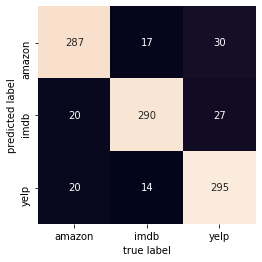

In [64]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_label, labels)

sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False,
            xticklabels = categories, yticklabels = categories)
plt.xlabel('true label')
plt.ylabel('predicted label');
#predict category of sentence => use confusion matrix to show

In [65]:
df_All_shuffle = df_All.sample(frac=1)  #suffle
size = 2000
train_data = df_All_shuffle.sentence[0:size]
test_data = df_All_shuffle.sentence[size:]
train_label = df_All_shuffle.sentiment_label[0:size]
test_label = df_All_shuffle.sentiment_label[size:]

tf_vectorizer = TfidfVectorizer()
train_data_tf = tf_vectorizer.fit_transform(train_data)
test_data_tf = tf_vectorizer.transform(test_data)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_data_tf, train_label)

y_pred = naive_bayes_classifier.predict(test_data_tf)
score = metrics.accuracy_score(test_label, y_pred)
print("accuracy: %0.1f" %(score*100) + "%")
#find test sentiment label=>calculate accuracy

accuracy: 82.4%


In [66]:
df_All_shuffle = df_All.sample(frac=1)  #suffle data
size = 2000
train_data = df_All_shuffle.sentence[0:size]
test_data = df_All_shuffle.sentence[size:]
train_label = df_All_shuffle.category_name[0:size]
test_label = df_All_shuffle.category_name[size:]

tf_vectorizer = TfidfVectorizer()
train_data_tf = tf_vectorizer.fit_transform(train_data)
test_data_tf = tf_vectorizer.transform(test_data)

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_data_tf, train_label)

y_pred = naive_bayes_classifier.predict(test_data_tf)
score = metrics.accuracy_score(test_label, y_pred)
print("accuracy: %0.1f" %(score*100) + "%")
#find test category_name=>calculate accuracy

accuracy: 85.7%


## 4 Improve the efficiency

In feature subset selection, the vectorizer is so big.
Then, in every text vector is so many 0. Maybe it can leave some important information. If the frequency of the word is too low, we can remove it. Keep the more crucial words. Then the visualization can be more explicit.

In aggregation part, sum data in every column spend long times.
like below

In [67]:
'''term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))'''

'term_frequencies = []\nfor j in range(0,X_counts.shape[1]):\n    term_frequencies.append(sum(X_counts[:,j].toarray()))'

So, it can use another way to calculate the total number like below. It save more time to process.

In [68]:
#term_frequencies = np.asarray(X_counts.sum(axis=0))[0]